In [1]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 1.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [2]:
!pip install rake-nltk

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7831 sha256=606761730da090d4182403c9bee0fe37a6a97997fa76c6ad82f4279d38eb99b7
  Stored in directory: /root/.cache/pip/wheels/7c/d9/8a/b8a9244fa89a07f288f9fe006aafc79d93fceb58496c29b606
Successfully built rake-nltk


In [3]:
from rake_nltk import Rake

In [4]:
!pip install contractions

     |████████████████████████████████| 321 kB 6.8 MB/s 
     |████████████████████████████████| 283 kB 51.3 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85470 sha256=38ddf1be2264ae0e99ddce415ddeff7114526710397596e57b3280e8e18ce00b
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import contractions
%matplotlib inline  

In [6]:
import pandas
hotel=pd.read_csv("/content/sample_data/london_hotel_reviews1.csv")  
hotel 

Unnamed: 0                                                  0
0               0  For the location this wasn't too bad. However,...
1               1  Spent a couple of nights in this hotel and it ...
2               2  My partner and I stayed here and really couldn...
3               3  Visited London for three days with my daughter...
4               4  Was fantastic to be back in a hotel again and ...
...           ...                                                ...
12727       12727  My family of 3 stayed in a triple for 9 nights...
12728       12728  I stayed here just after Christmas for a few d...
12729       12729  We just got back from a week long holiday in L...
12730       12730  The Strand Palace is ideally located on the St...
12731       12731  Have stayed on business here many times (total...

[12732 rows x 2 columns]

In [7]:
hotel.columns=['Index','Reviews']

In [8]:
hotel = hotel.drop('Index', 1)

In [9]:
hotel.head()

Reviews
0  For the location this wasn't too bad. However,...
1  Spent a couple of nights in this hotel and it ...
2  My partner and I stayed here and really couldn...
3  Visited London for three days with my daughter...
4  Was fantastic to be back in a hotel again and ...


#EXPLORATORY DATA ANALYSIS (EDA)
##Text Pre-Processing
##Expanding Contractions


In [10]:
import re

In [11]:
#Create a function to remove special characters
def remove_special_characters(text):
    pat = r'[^a-zA-z0-9]' 
    return re.sub(pat, ' ', text)

In [12]:
# lets apply this function
hotel['Reviews'] = hotel.apply(lambda x: remove_special_characters(x['Reviews']), axis = 1)

In [13]:
hotel['Reviews']

0        For the location this wasn t too bad  However ...
1        Spent a couple of nights in this hotel and it ...
2        My partner and I stayed here and really couldn...
3        Visited London for three days with my daughter...
4        Was fantastic to be back in a hotel again and ...
                               ...                        
12727    My family of 3 stayed in a triple for 9 nights...
12728    I stayed here just after Christmas for a few d...
12729    We just got back from a week long holiday in L...
12730    The Strand Palace is ideally located on the St...
12731    Have stayed on business here many times  total...
Name: Reviews, Length: 12732, dtype: object

In [14]:
hotel['no_contract'] = hotel['Reviews'].apply(lambda x: [contractions.fix(word) for word in x.split()])

In [15]:
hotel['expanded_text'] = [' '.join(map(str, l)) for l in hotel['no_contract']]

In [16]:
hotel.head()

Reviews  ...                                      expanded_text
0  For the location this wasn t too bad  However ...  ...  For the location this wasn t too bad However w...
1  Spent a couple of nights in this hotel and it ...  ...  Spent a couple of nights in this hotel and it ...
2  My partner and I stayed here and really couldn...  ...  My partner and I stayed here and really couldn...
3  Visited London for three days with my daughter...  ...  Visited London for three days with my daughter...
4  Was fantastic to be back in a hotel again and ...  ...  Was fantastic to be back in a hotel again and ...

[5 rows x 3 columns]

What are contractions?

Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe.

We are going to add a new column to our dataframe called 'expanded_text' and apply contraction function to 'content' column which will expand any contractions
In the 1st row we can see "wasn't" is expanded to "was not".

#### Removing Punctuations

In [17]:
hotel['no_punc'] = hotel['expanded_text'].str.replace('[^\w\s]','')
hotel.head()

Reviews  ...                                            no_punc
0  For the location this wasn t too bad  However ...  ...  For the location this wasn t too bad However w...
1  Spent a couple of nights in this hotel and it ...  ...  Spent a couple of nights in this hotel and it ...
2  My partner and I stayed here and really couldn...  ...  My partner and I stayed here and really couldn...
3  Visited London for three days with my daughter...  ...  Visited London for three days with my daughter...
4  Was fantastic to be back in a hotel again and ...  ...  Was fantastic to be back in a hotel again and ...

[5 rows x 4 columns]

#### Tokenization

In [18]:
# Tokenization of the string i.e divding the string into separate words

In [19]:
!pip install nltk

In [20]:
import nltk

In [21]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
from nltk.tokenize import word_tokenize

In [24]:
hotel['tokenized'] = hotel['no_punc'].apply(word_tokenize)
hotel.head()

Reviews  ...                                          tokenized
0  For the location this wasn t too bad  However ...  ...  [For, the, location, this, wasn, t, too, bad, ...
1  Spent a couple of nights in this hotel and it ...  ...  [Spent, a, couple, of, nights, in, this, hotel...
2  My partner and I stayed here and really couldn...  ...  [My, partner, and, I, stayed, here, and, reall...
3  Visited London for three days with my daughter...  ...  [Visited, London, for, three, days, with, my, ...
4  Was fantastic to be back in a hotel again and ...  ...  [Was, fantastic, to, be, back, in, a, hotel, a...

[5 rows x 5 columns]

In [25]:
#### Converting all Characters to Lowercase

In [26]:
# Converting Uppercase letters to Lowercase

In [27]:
hotel['lower'] = hotel['tokenized'].apply(lambda x: [word.lower() for word in x])
hotel.head()

Reviews  ...                                              lower
0  For the location this wasn t too bad  However ...  ...  [for, the, location, this, wasn, t, too, bad, ...
1  Spent a couple of nights in this hotel and it ...  ...  [spent, a, couple, of, nights, in, this, hotel...
2  My partner and I stayed here and really couldn...  ...  [my, partner, and, i, stayed, here, and, reall...
3  Visited London for three days with my daughter...  ...  [visited, london, for, three, days, with, my, ...
4  Was fantastic to be back in a hotel again and ...  ...  [was, fantastic, to, be, back, in, a, hotel, a...

[5 rows x 6 columns]

In [28]:
#### Number of stopwords

In [29]:
# Adding a column "stopwords" which shows the count of stopwords in the text.

In [30]:
from nltk.corpus import stopwords, wordnet

In [31]:
stop = stopwords.words('english')

hotel['stopwords'] = hotel['expanded_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
hotel.head()


Reviews  ... stopwords
0  For the location this wasn t too bad  However ...  ...        52
1  Spent a couple of nights in this hotel and it ...  ...        18
2  My partner and I stayed here and really couldn...  ...        62
3  Visited London for three days with my daughter...  ...        74
4  Was fantastic to be back in a hotel again and ...  ...        19

[5 rows x 7 columns]

In [32]:
#### Removing Stopwords

In [33]:
stop_words = set(stopwords.words('english'))
hotel['stopwords_removed'] = hotel['lower'].apply(lambda x: [word for word in x if word not in stop_words])
hotel.head()

Reviews  ...                                  stopwords_removed
0  For the location this wasn t too bad  However ...  ...  [location, bad, however, smallest, hotel, room...
1  Spent a couple of nights in this hotel and it ...  ...  [spent, couple, nights, hotel, fantastic, hote...
2  My partner and I stayed here and really couldn...  ...  [partner, stayed, really, fault, hotel, staff,...
3  Visited London for three days with my daughter...  ...  [visited, london, three, days, daughter, mid, ...
4  Was fantastic to be back in a hotel again and ...  ...  [fantastic, back, hotel, also, somewhere, real...

[5 rows x 8 columns]

In [34]:
#### Number of words

In [35]:
#Number of Words in single review
hotel['word_count'] = hotel['stopwords_removed'].apply(lambda x: len(str(x).split(" ")))
hotel.head()

Reviews  ... word_count
0  For the location this wasn t too bad  However ...  ...         53
1  Spent a couple of nights in this hotel and it ...  ...         17
2  My partner and I stayed here and really couldn...  ...         56
3  Visited London for three days with my daughter...  ...         76
4  Was fantastic to be back in a hotel again and ...  ...         22

[5 rows x 9 columns]

In [36]:
#### Number of Characters

In [37]:
#Number of characters in single review 
hotel['char_count'] = hotel['no_punc'].str.len() 
hotel.head()

Reviews  ... char_count
0  For the location this wasn t too bad  However ...  ...        554
1  Spent a couple of nights in this hotel and it ...  ...        208
2  My partner and I stayed here and really couldn...  ...        653
3  Visited London for three days with my daughter...  ...        774
4  Was fantastic to be back in a hotel again and ...  ...        241

[5 rows x 10 columns]

In [38]:
#### Wordcloud 

In [39]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [40]:
# Joining the list into one string/text
hotel['stp_rem_str'] = [' '.join(map(str, l)) for l in hotel['stopwords_removed']]
text = ' '.join(hotel['stp_rem_str'])

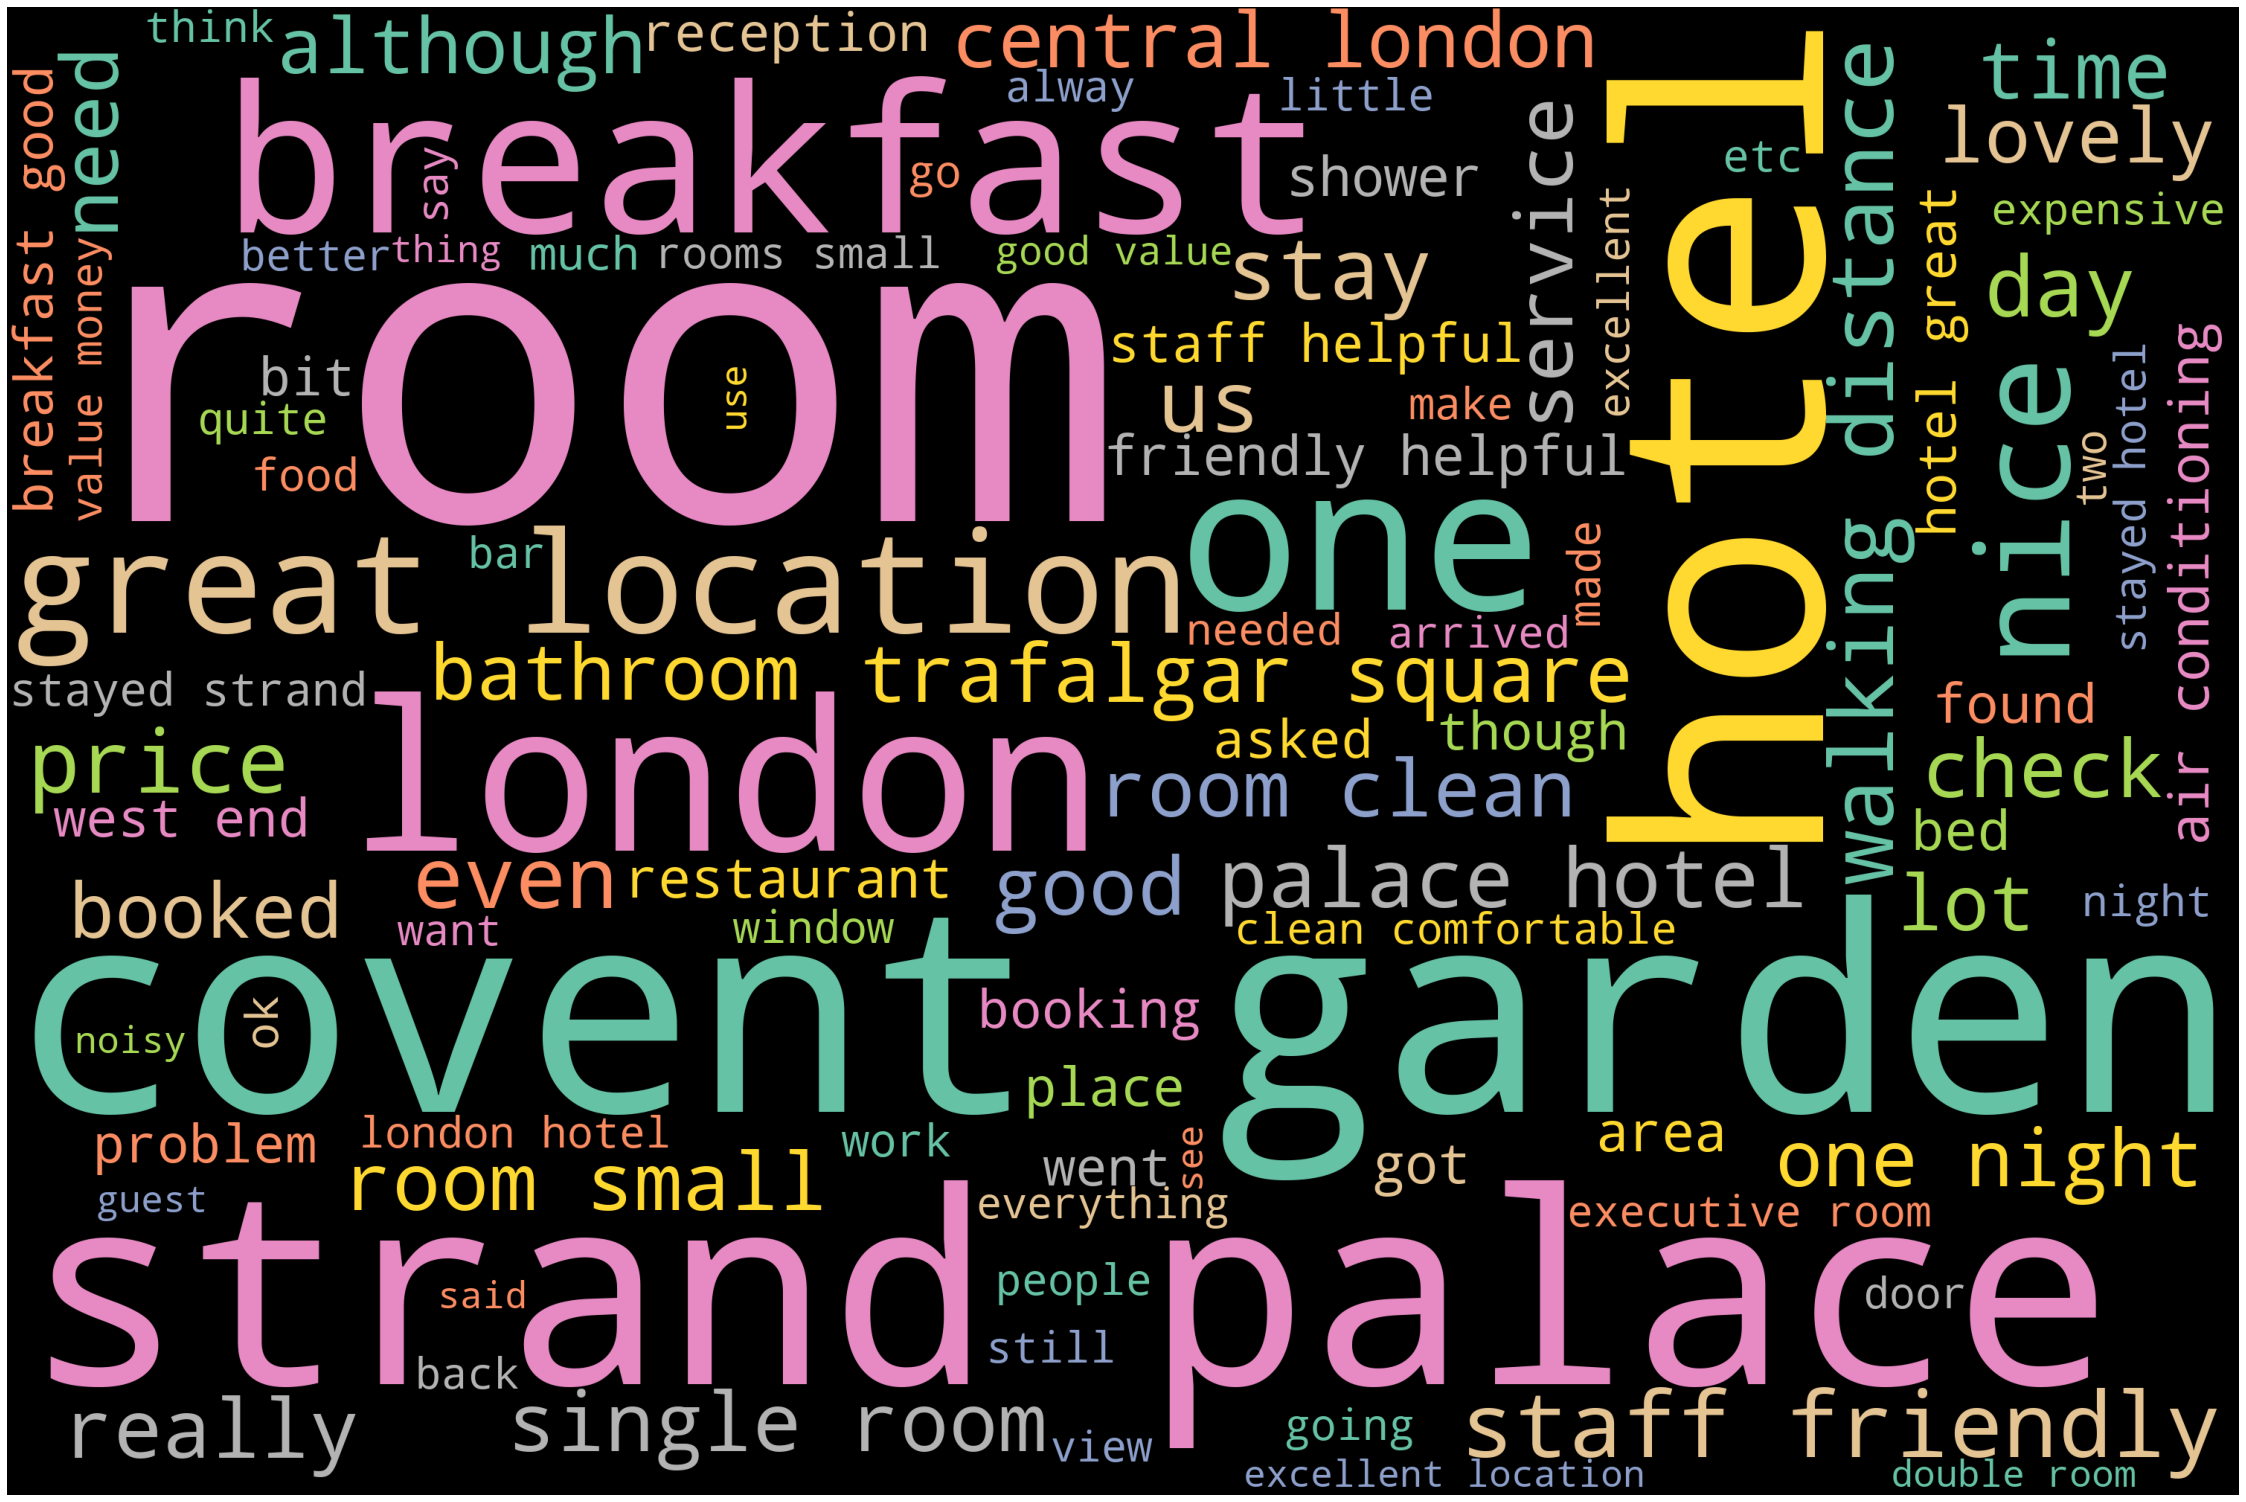

In [41]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [42]:
#### Stemming

In [43]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
hotel['stemmi']=hotel['stp_rem_str'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [44]:
hotel.head()

Reviews  ...                                             stemmi
0  For the location this wasn t too bad  However ...  ...  locat bad howev smallest hotel room ever stay ...
1  Spent a couple of nights in this hotel and it ...  ...  spent coupl night hotel fantast hotel central ...
2  My partner and I stayed here and really couldn...  ...  partner stay realli fault hotel staff friendli...
3  Visited London for three days with my daughter...  ...  visit london three day daughter mid juli book ...
4  Was fantastic to be back in a hotel again and ...  ...  fantast back hotel also somewher realli centra...

[5 rows x 12 columns]

In [45]:
#### Lemmatization


In [46]:
from textblob import Word

In [47]:
hotel['lemma'] = hotel['stemmi'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [48]:
hotel.head()

Reviews  ...                                              lemma
0  For the location this wasn t too bad  However ...  ...  locat bad howev smallest hotel room ever stay ...
1  Spent a couple of nights in this hotel and it ...  ...  spent coupl night hotel fantast hotel central ...
2  My partner and I stayed here and really couldn...  ...  partner stay realli fault hotel staff friendli...
3  Visited London for three days with my daughter...  ...  visit london three day daughter mid juli book ...
4  Was fantastic to be back in a hotel again and ...  ...  fantast back hotel also somewher realli centra...

[5 rows x 13 columns]

In [49]:
hotel[['stemmi','lemma']].head()

stemmi                                              lemma
0  locat bad howev smallest hotel room ever stay ...  locat bad howev smallest hotel room ever stay ...
1  spent coupl night hotel fantast hotel central ...  spent coupl night hotel fantast hotel central ...
2  partner stay realli fault hotel staff friendli...  partner stay realli fault hotel staff friendli...
3  visit london three day daughter mid juli book ...  visit london three day daughter mid juli book ...
4  fantast back hotel also somewher realli centra...  fantast back hotel also somewher realli centra...

In [50]:
####Clean The Data


In [51]:
import re

In [52]:
def cleantext(text):
    text = re.sub(r"â€™", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"\w*\d\w*", "", text) # Remove numbers
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    text = re.sub(r"______________", "", text) # Remove _____
    
    
    return text

In [53]:
hotel['cleaned'] = hotel['lemma'].apply(cleantext)

In [54]:
hotel.head()

Reviews  ...                                            cleaned
0  For the location this wasn t too bad  However ...  ...  locat bad howev smallest hotel room ever stay ...
1  Spent a couple of nights in this hotel and it ...  ...  spent coupl night hotel fantast hotel central ...
2  My partner and I stayed here and really couldn...  ...  partner stay realli fault hotel staff friendli...
3  Visited London for three days with my daughter...  ...  visit london three day daughter mid juli book ...
4  Was fantastic to be back in a hotel again and ...  ...  fantast back hotel also somewher realli centra...

[5 rows x 14 columns]

In [55]:
#### Top 25 most used words.

In [56]:
reviews=np.array(hotel['cleaned'])
s=str(reviews)
token = word_tokenize(s)
print(token)

['[', "'locat", 'bad', 'howev', 'smallest', 'hotel', 'room', 'ever', 'stay', 'small', 'doubl', 'bed', 'wall', 'particularli', 'comfi', 'hair', 'room', 'includ', 'mani', 'bathroom', 'floor', 'end', 'put', 'larg', 'towel', 'floor', 'stop', 'stare', 'make', 'consist', 'long', 'black', 'hair', 'bed', 'duvet', 'pull', 'back', 'find', 'anoth', 'hotel', 'next', 'time', 'poor', 'welcom', 'robot', 'hotel', 'size', 'busi', 'churn', 'guest', 'luckili', 'stay', 'one', "night'", "'spent", 'coupl', 'night', 'hotel', 'fantast', 'hotel', 'central', 'staff', 'friendli', 'help', 'hotel', 'clean', 'safe', 'comfort', 'stay', 'highli', "recommend'", "'partner", 'stay', 'realli', 'fault', 'hotel', 'staff', 'friendli', 'noth', 'bother', 'troubl', 'aircon', 'someon', 'within', 'minut', 'fix', 'flight', 'night', 'time', 'watch', 'luggag', 'free', 'charg', 'moham', 'realli', 'friendli', 'help', 'locat', 'amaz', 'covent', 'garden', 'trafalgar', 'squar', 'bottom', 'street', 'buckingham', 'palac', 'minut', 'walk',

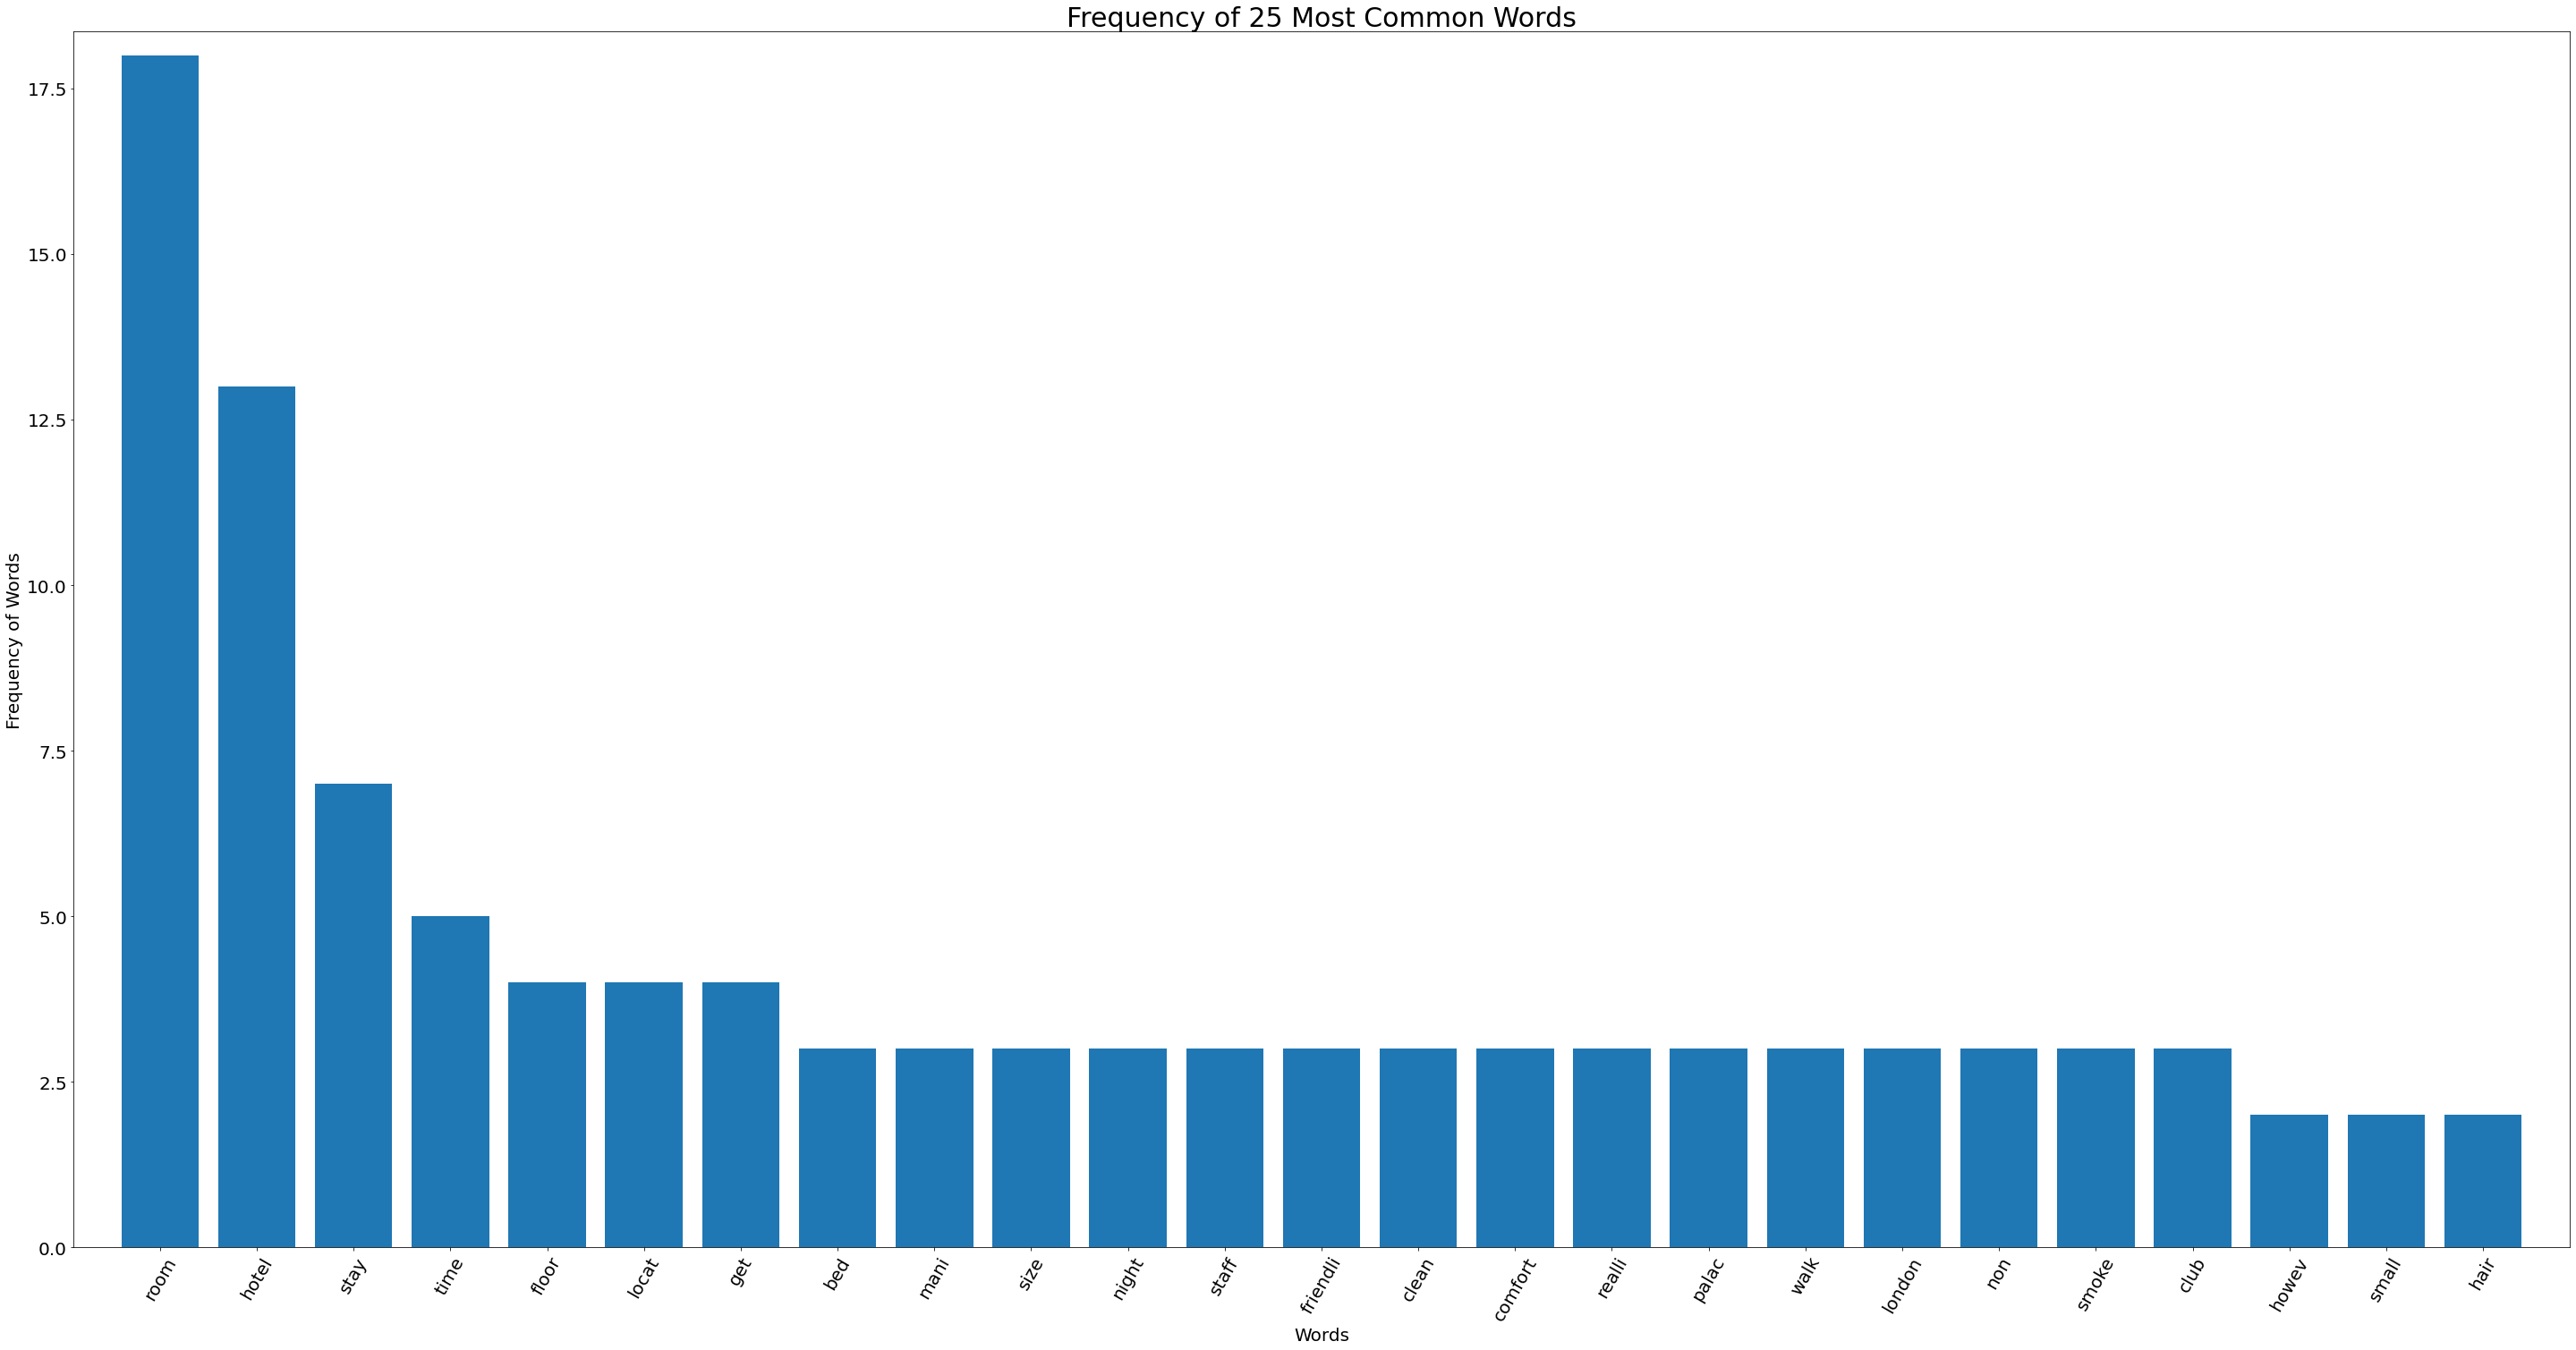

In [57]:
from nltk.probability import FreqDist
mostcommon_1 = FreqDist(token).most_common(25)
x, y = zip(*mostcommon_1)
plt.figure(figsize=(50,25))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency of Words', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=60, fontsize=20)
plt.title('Frequency of 25 Most Common Words', fontsize=30)
plt.show()

In [58]:
#### Bi-Gram Chart

In [59]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [60]:
# Top 20 Bi-gram words
from sklearn.feature_extraction.text import CountVectorizer
top2_words = get_top_n2_words(hotel["cleaned"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(30)

Bi-gram  Freq
0     covent garden  2880
1      strand palac  2518
2       great locat  1301
3        room small  1280
4        room clean  1195
5       stay strand  1074
6    staff friendli  1065
7      walk distanc  1017
8        stay hotel   895
9        singl room   848
10      palac hotel   844
11       air condit   837
12  trafalgar squar   807
13        one night   767
14   central london   739
15    friendli help   713
16       minut walk   699
17       staff help   629
18   breakfast good   629
19         west end   605
20      hotel great   579
21       hotel room   547
22    would definit   505
23      hotel locat   503
24    central locat   491
25       valu money   476
26    clean comfort   472
27      execut room   463
28      excel locat   454
29        good valu   441

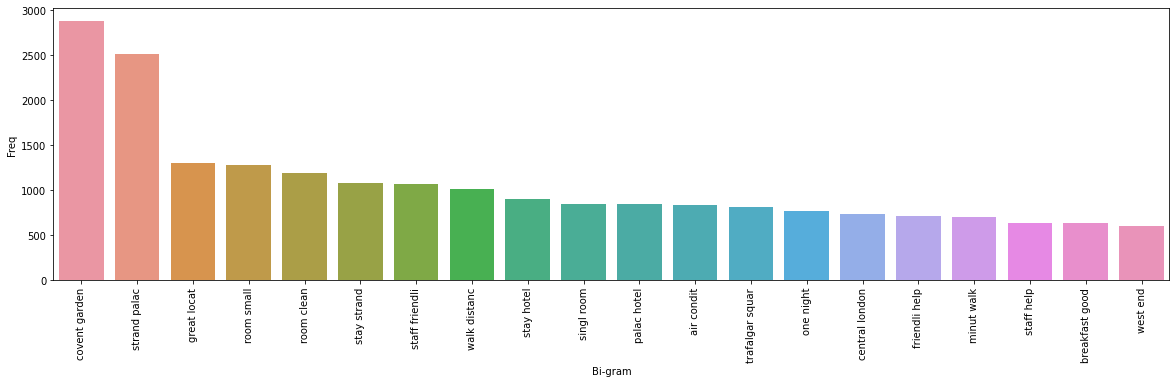

In [61]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

In [62]:
#### Tri-Gram Chart

In [63]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [64]:
top3_words = get_top_n3_words(hotel["cleaned"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [65]:
# Top 20 Tri gram words
top3_df.head(30)

Tri-gram  Freq
0         stay strand palac   929
1        strand palac hotel   827
2       within walk distanc   402
3       staff friendli help   389
4         hotel great locat   348
5            stay one night   310
6        walk covent garden   293
7        would definit stay   255
8       close covent garden   230
9           good valu money   185
10  covent garden trafalgar   167
11   garden trafalgar squar   158
12          room air condit   157
13       room clean comfort   156
14     theatr covent garden   141
15        minut walk covent   140
16      locat covent garden   137
17          air condit room   133
18     covent garden theatr   131
19       near covent garden   126
20     walk trafalgar squar   126
21        easi walk distanc   125
22    would recommend hotel   124
23      chare cross station   123
24          west end theatr   117
25          room quit small   116
26      friendli help staff   116
27       night strand palac   111
28      staff help friendli   110
29      squar covent garden   109

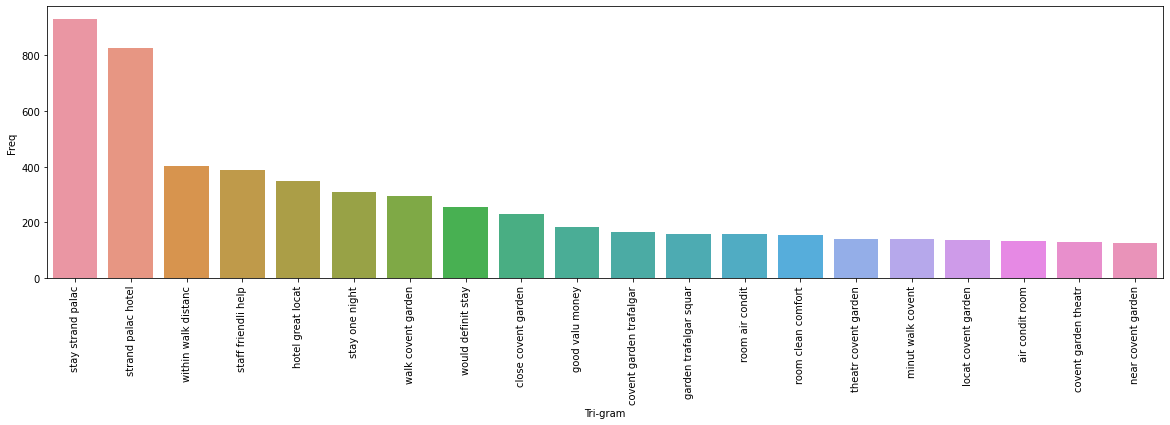

In [66]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

In [67]:
### Removing some unwanted words

In [68]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
sw_nltk = stopwords.words('english')

In [70]:
sw_nltk.extend(['howev','ever','particularli','includ','end','put','stop','make','find','hotel','trafalgar','excel','would','realli','also','week','deliveriesrefus','lowandbeholdtwo','back','strand','palac','london','go','come'])

In [71]:
hotel['cleaned_1'] = hotel['cleaned'].str.split().map(lambda x: [word for word in x if word not in sw_nltk])

In [72]:
hotel.head()

Reviews  ...                                          cleaned_1
0  For the location this wasn t too bad  However ...  ...  [locat, bad, smallest, room, stay, small, doub...
1  Spent a couple of nights in this hotel and it ...  ...  [spent, coupl, night, fantast, central, staff,...
2  My partner and I stayed here and really couldn...  ...  [partner, stay, fault, staff, friendli, noth, ...
3  Visited London for three days with my daughter...  ...  [visit, three, day, daughter, mid, juli, book,...
4  Was fantastic to be back in a hotel again and ...  ...  [fantast, somewher, central, stay, time, ago, ...

[5 rows x 15 columns]

In [73]:
hotel['cleaned_1']=hotel['cleaned_1'].apply(' '.join)

In [74]:
hotel['cleaned_1']

0        locat bad smallest room stay small doubl bed w...
1        spent coupl night fantast central staff friend...
2        partner stay fault staff friendli noth bother ...
3        visit three day daughter mid juli book late de...
4        fantast somewher central stay time ago pleasan...
                               ...                        
12727    famili stay tripl night feb room clean effici ...
12728    stay christma day locat beat within walk dista...
12729    got long holiday overal stay turn fine take st...
12730    ideal locat within walk distanc squar chare cr...
12731    stay busi mani time total sever month standard...
Name: cleaned_1, Length: 12732, dtype: object

In [75]:
##Building wordcloud after removing unwanted words

In [76]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [77]:
text = ' '.join(hotel['cleaned_1'])

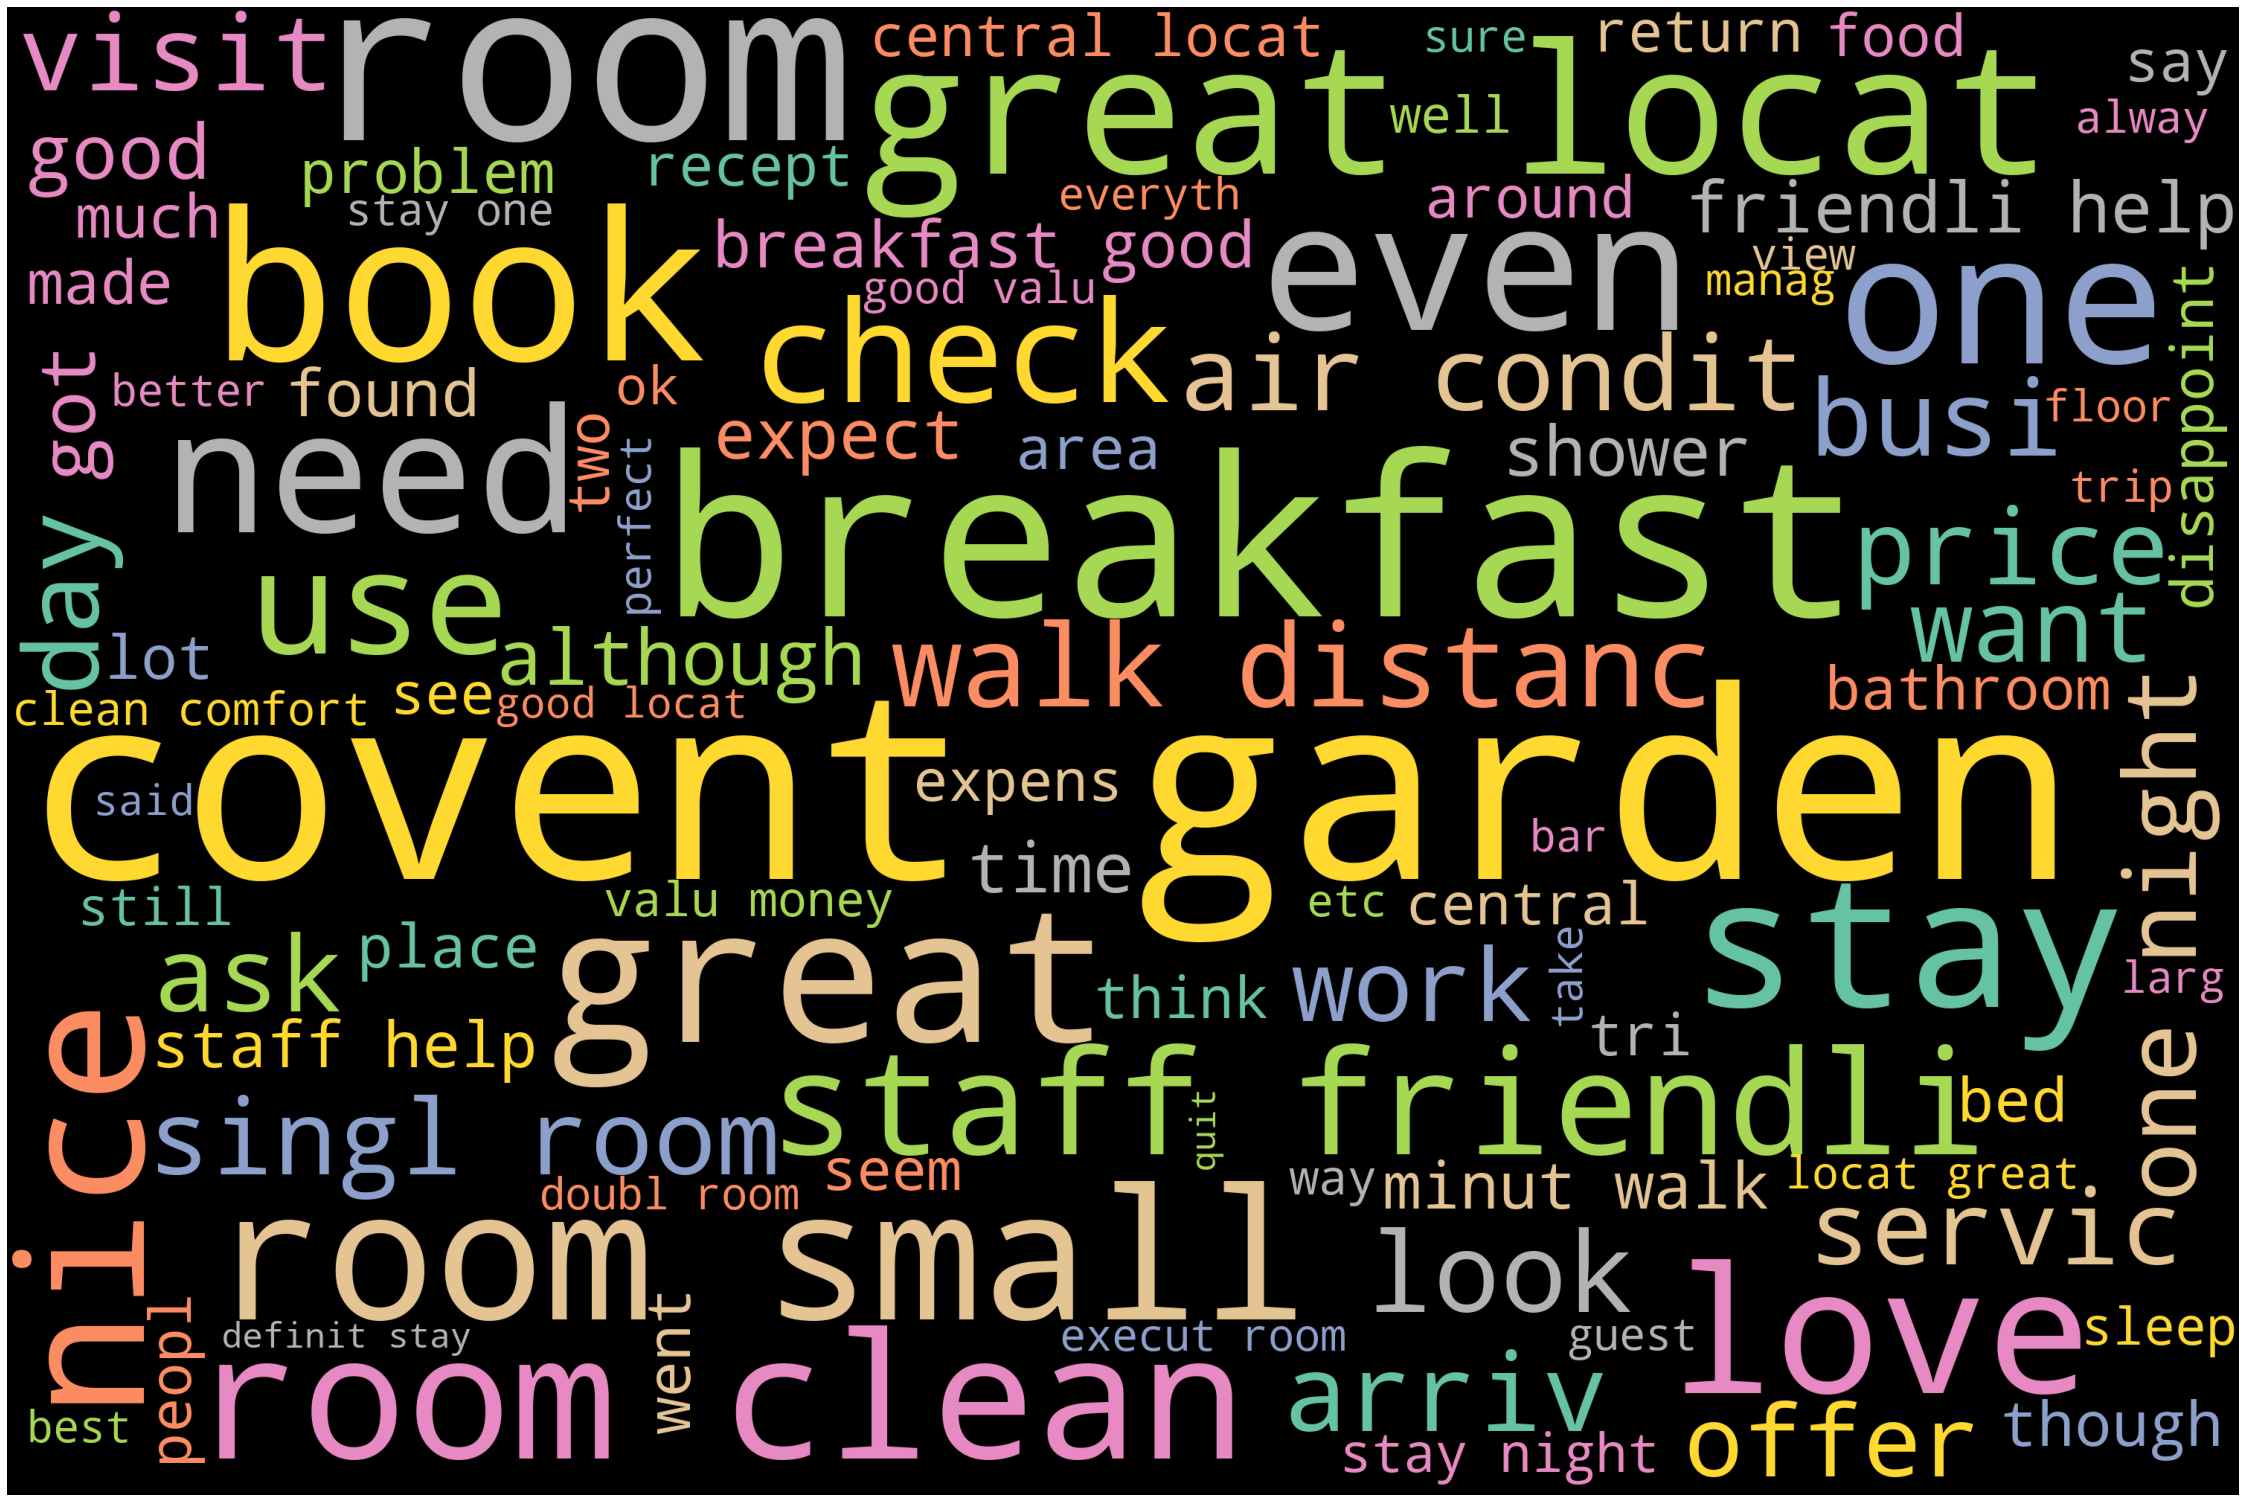

In [78]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [79]:
#### Sentiment Analysis

In [80]:
from textblob import TextBlob



In [81]:
hotel['senti_polar'] = hotel['lemma'].apply(lambda x: TextBlob(x).sentiment.polarity )

In [82]:
hotel[['Reviews','senti_polar']].head()

Reviews  senti_polar
0  For the location this wasn t too bad  However ...    -0.223810
1  Spent a couple of nights in this hotel and it ...     0.191667
2  My partner and I stayed here and really couldn...     0.295238
3  Visited London for three days with my daughter...     0.127778
4  Was fantastic to be back in a hotel again and ...     0.233333

In [83]:
#### Histogram of Sentiment polarity range 

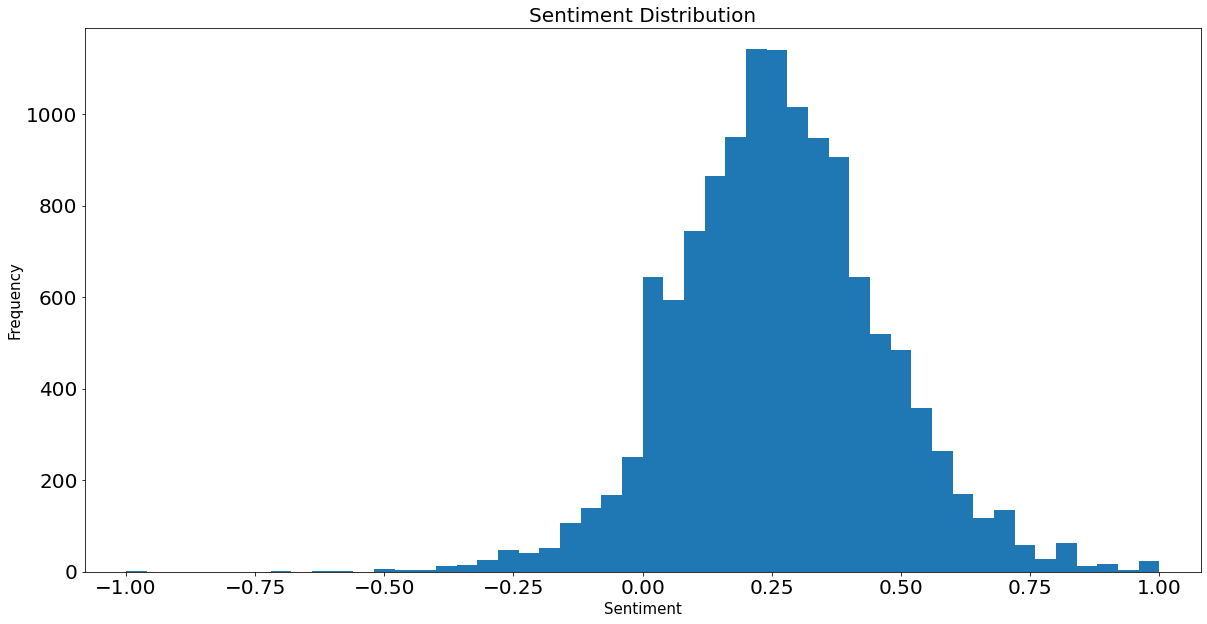

In [84]:
plt.figure(figsize=(20,10))
plt.margins(0.04)
plt.xlabel('Sentiment', fontsize=15)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=20)
plt.hist(hotel['senti_polar'], bins=50)
plt.title('Sentiment Distribution', fontsize=20)
plt.show()

In [87]:
#### Emotion Mining using Afinn dataset

In [88]:
#Sentiment analysis
afinn = pd.read_csv('/content/sample_data/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [89]:
afinn.head() 

word  value
0    abandon     -2
1  abandoned     -2
2   abandons     -2
3   abducted     -2
4  abduction     -2

In [90]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 

In [91]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [92]:
hotel['sentiment_value'] = hotel['lemma'].apply(calculate_sentiment) 

In [93]:
hotel[['Reviews','sentiment_value']]

Reviews  sentiment_value
0      For the location this wasn t too bad  However ...               -6
1      Spent a couple of nights in this hotel and it ...                9
2      My partner and I stayed here and really couldn...               11
3      Visited London for three days with my daughter...               11
4      Was fantastic to be back in a hotel again and ...                3
...                                                  ...              ...
12727  My family of 3 stayed in a triple for 9 nights...                8
12728  I stayed here just after Christmas for a few d...                9
12729  We just got back from a week long holiday in L...               10
12730  The Strand Palace is ideally located on the St...                6
12731  Have stayed on business here many times  total...                5

[12732 rows x 2 columns]

In [94]:
# Sentiment score of the whole review
hotel['sentiment_value'].describe()

count    12732.000000
mean         7.631637
std          5.872352
min        -15.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         40.000000
Name: sentiment_value, dtype: float64

In [95]:
# Sentiment score of the whole review
hotel[hotel['sentiment_value']<=0]

Reviews  ... sentiment_value
0      For the location this wasn t too bad  However ...  ...              -6
5      For the location this wasn t too bad  However ...  ...              -6
26     Booked a 3 night stay  breakfast was a shamble...  ...               0
44     Terrible customer service  I tried to book a s...  ...              -4
49     This is my first choice of a place to stay in ...  ...              -1
...                                                  ...  ...             ...
12712  I was in London on a temporary work assignment...  ...              -4
12716  November 7  2003 just returned from first visi...  ...              -4
12721  I stayed at the Strand Palace hotel for 1 nigh...  ...               0
12723  I have never been so horrified in my life  Wal...  ...              -1
12725  I stayed in the Strand Palace in December 2001...  ...              -2

[1294 rows x 17 columns]

In [96]:
hotel[hotel['sentiment_value']>=20]

Reviews  ... sentiment_value
24     Perfect location  2 minute walk from Covent Ga...  ...              21
40     A very well appointed hotel almost opposite th...  ...              22
42     Lovely  clean hotel with lovely interior and f...  ...              21
46     A short stay while having a city break to Lond...  ...              26
51     I booked The Strand Palace Hotel as a surprise...  ...              24
...                                                  ...  ...             ...
12604  After reading reviews  I arrived for a 6 night...  ...              21
12638  We just returned from Europe on Sept  7  2005 ...  ...              25
12645  Stayed here on a one nighter  Location is exce...  ...              24
12673  We stayed here for a long weekend 28th to 3oth...  ...              23
12703  My wife and I spent 5 nights here in January  ...  ...              20

[405 rows x 17 columns]

In [97]:
hotel['index']=range(0,len(hotel)) 

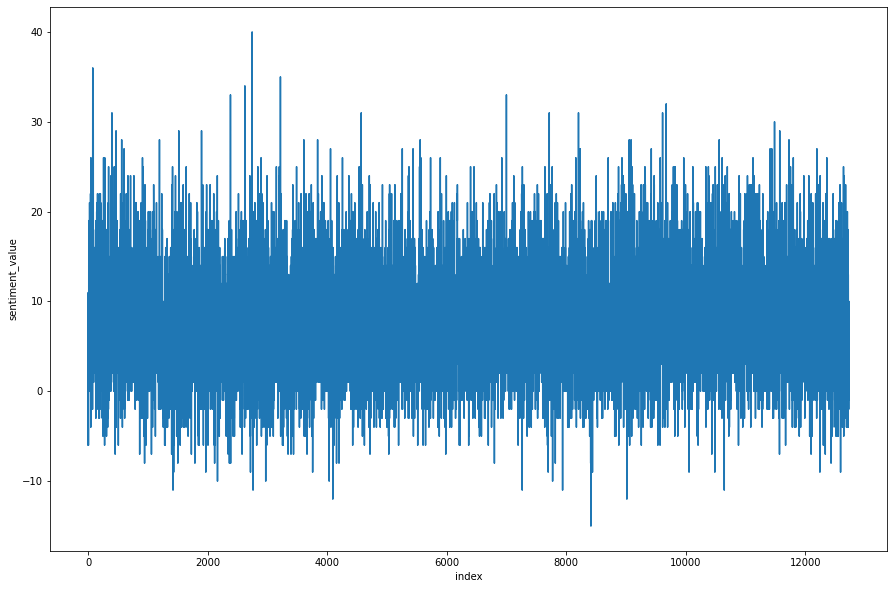

In [98]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=hotel) 

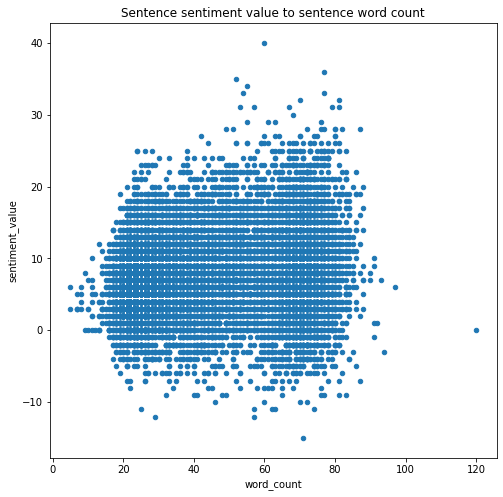

In [99]:
hotel.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [100]:
hotel['sentiment'] = hotel['sentiment_value'].apply(lambda x : 'Positive' if x > 0 else ('Negative' if x<0 else 'Neutral'))

In [101]:
hotel['sentiment']

0        Negative
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
12727    Positive
12728    Positive
12729    Positive
12730    Positive
12731    Positive
Name: sentiment, Length: 12732, dtype: object

In [102]:
Neutral_senti=hotel[hotel['sentiment_value']==0]

In [103]:
Positive_senti=hotel[hotel['sentiment_value']>0]

In [104]:
Negative_senti=hotel[hotel['sentiment_value']<0]

In [105]:
Neutral_senti

Reviews  ... sentiment
26     Booked a 3 night stay  breakfast was a shamble...  ...   Neutral
127    The hotel was well located  in a lively neighb...  ...   Neutral
181    Having arrived and spent 10mins waiting to get...  ...   Neutral
187    The best thing about this hotel is it s locati...  ...   Neutral
230    The location for us was excellent   We were se...  ...   Neutral
...                                                  ...  ...       ...
12651  Ok  good location  average sized room but that...  ...   Neutral
12660  This hotel is very centrally located in London...  ...   Neutral
12709  Great location  but that s all it has going fo...  ...   Neutral
12711  The Strand Palace does have a great location  ...  ...   Neutral
12721  I stayed at the Strand Palace hotel for 1 nigh...  ...   Neutral

[467 rows x 19 columns]

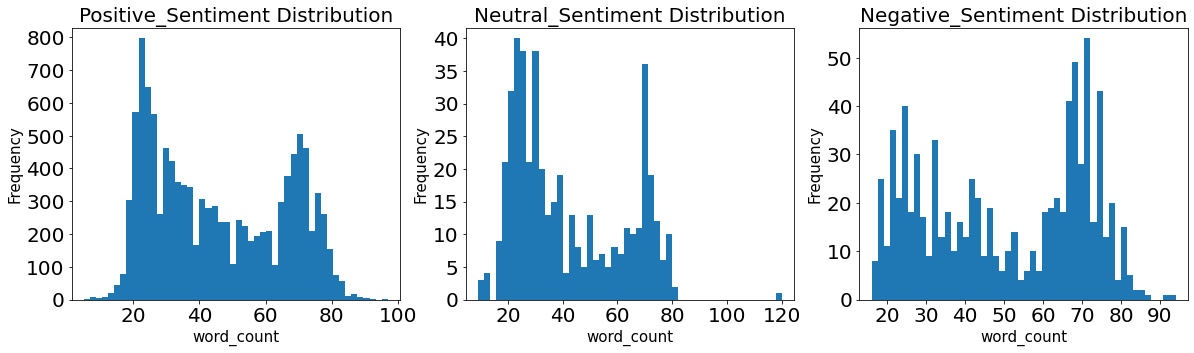

In [106]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.margins(0.04)
plt.xlabel('word_count', fontsize=15)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=20)
plt.hist(Positive_senti['word_count'], bins=50)
plt.title('Positive_Sentiment Distribution', fontsize=20)
plt.subplot(1,3,2)
plt.margins(0.04)
plt.xlabel('word_count', fontsize=15)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=20)
plt.hist(Neutral_senti['word_count'], bins=50)
plt.title('Neutral_Sentiment Distribution', fontsize=20)
plt.subplot(1,3,3)
plt.margins(0.04)
plt.xlabel('word_count', fontsize=15)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=20)
plt.hist(Negative_senti['word_count'], bins=50)
plt.title('Negative_Sentiment Distribution', fontsize=20)

plt.show()

In [107]:
## Wordcloud for Positive reviews.

In [108]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [109]:
text = ' '.join(Positive_senti['cleaned_1'])

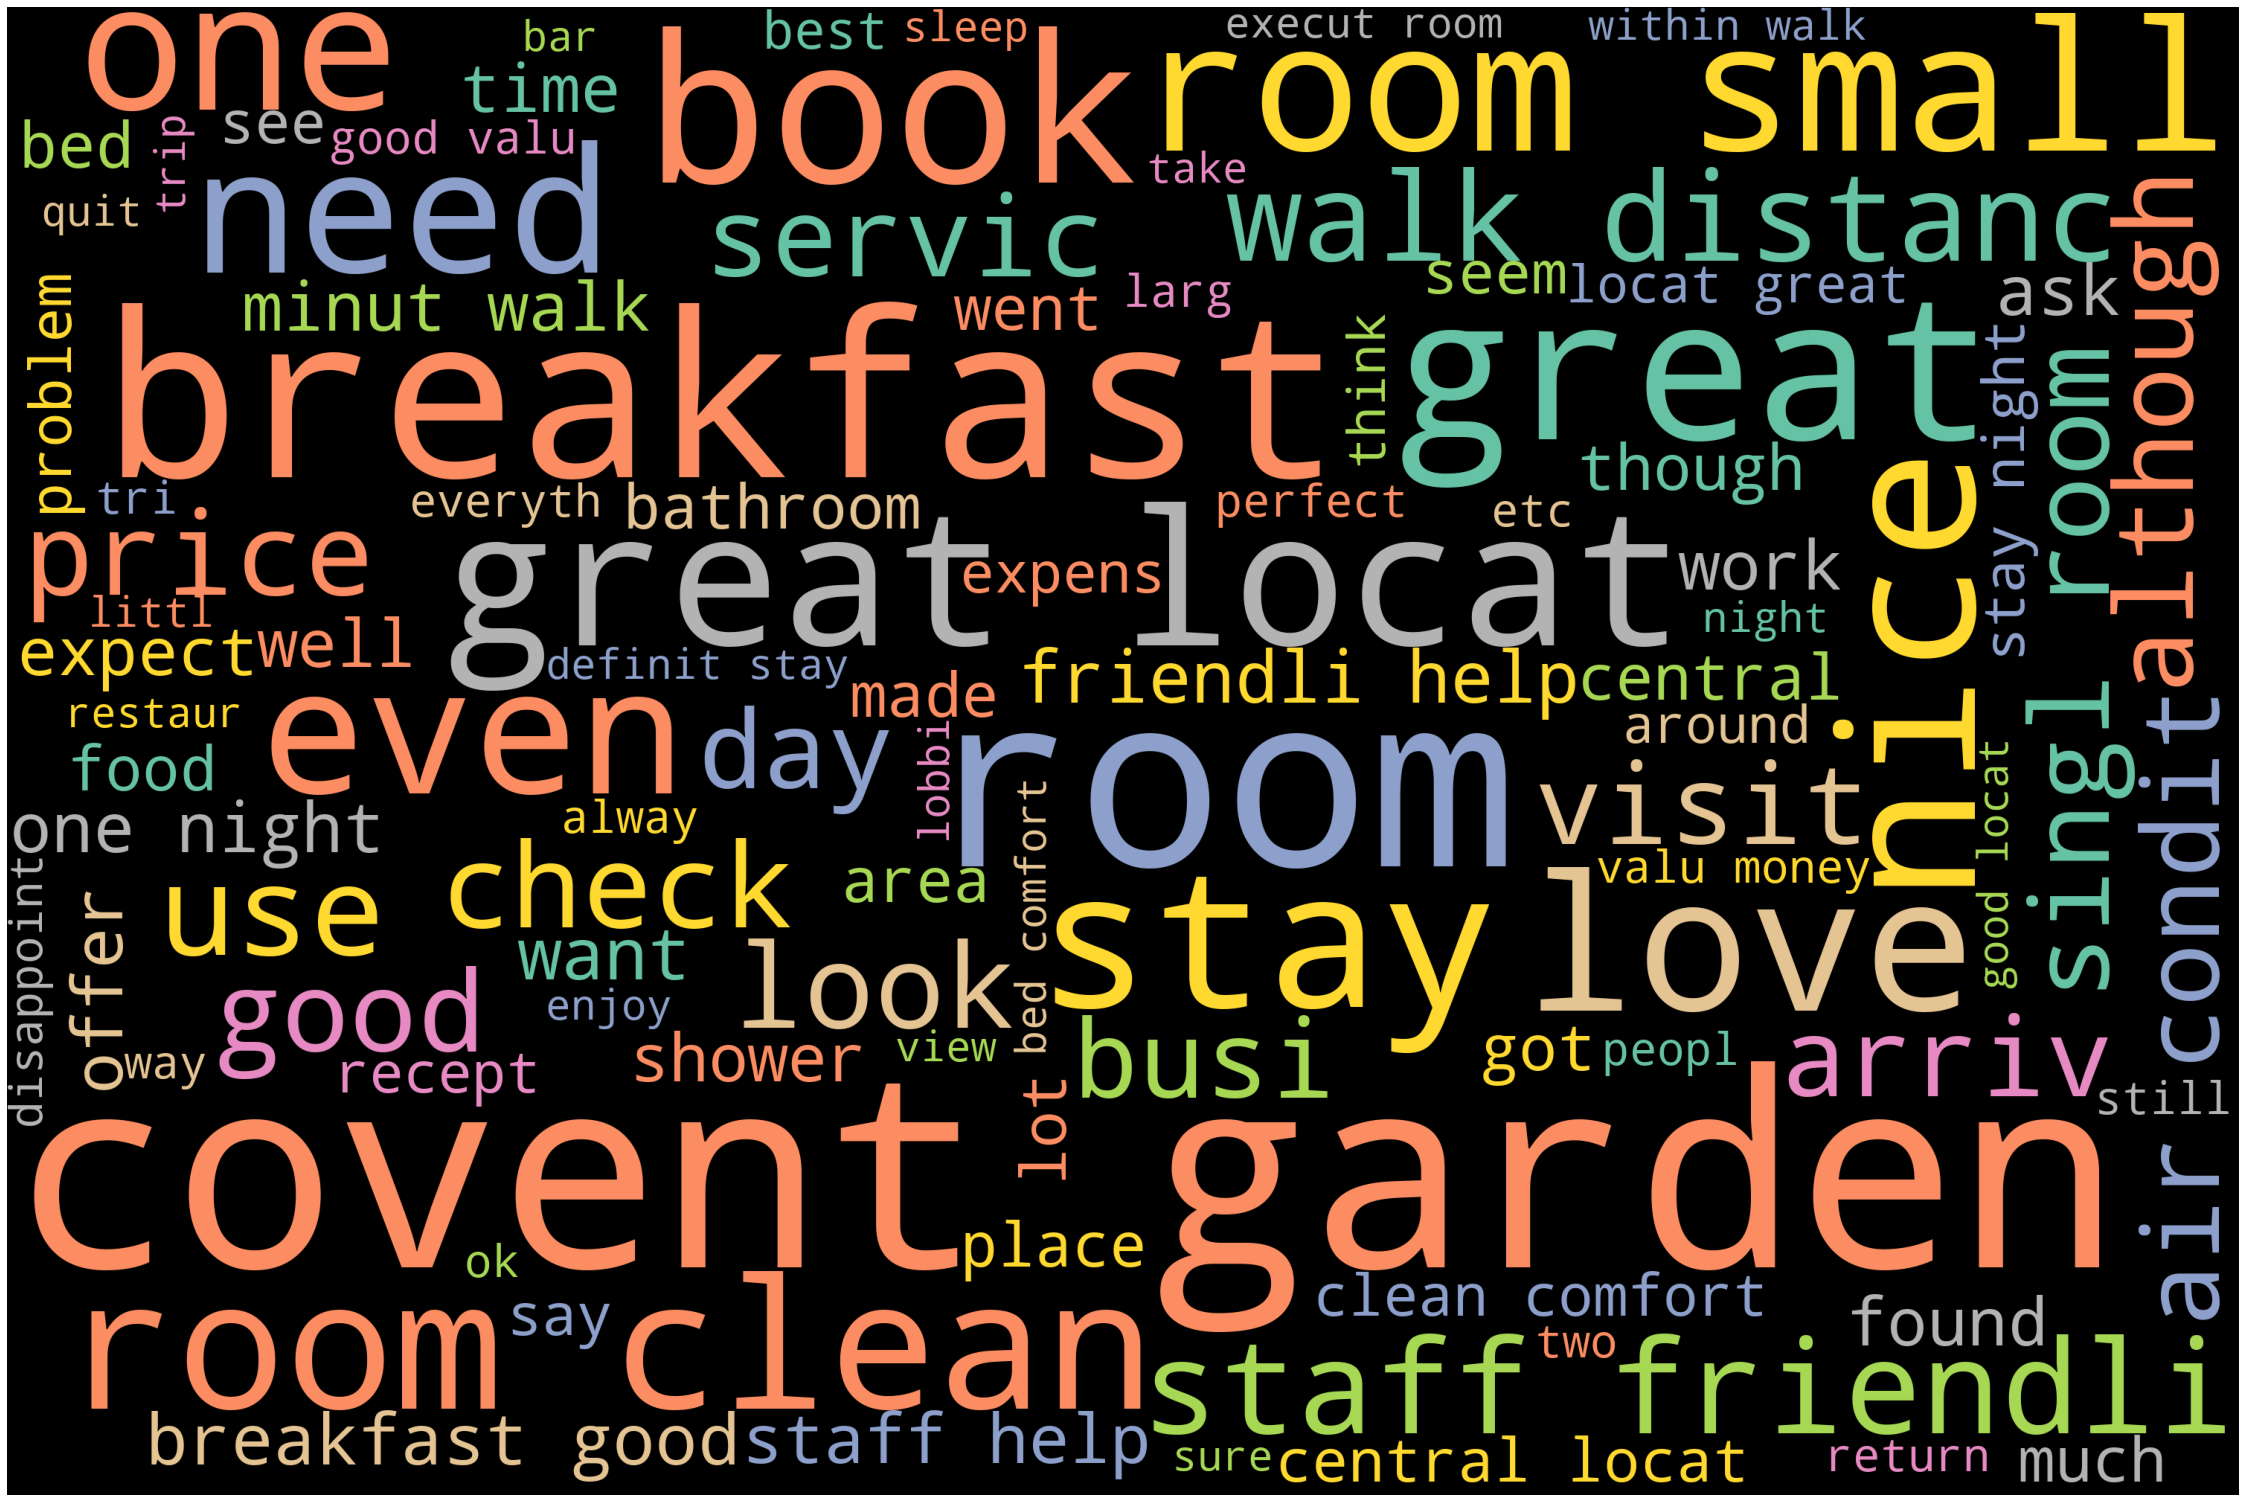

In [110]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [111]:
## Wordcloud for Neutral reviews.

In [112]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [113]:
text = ' '.join(Neutral_senti['cleaned_1'])

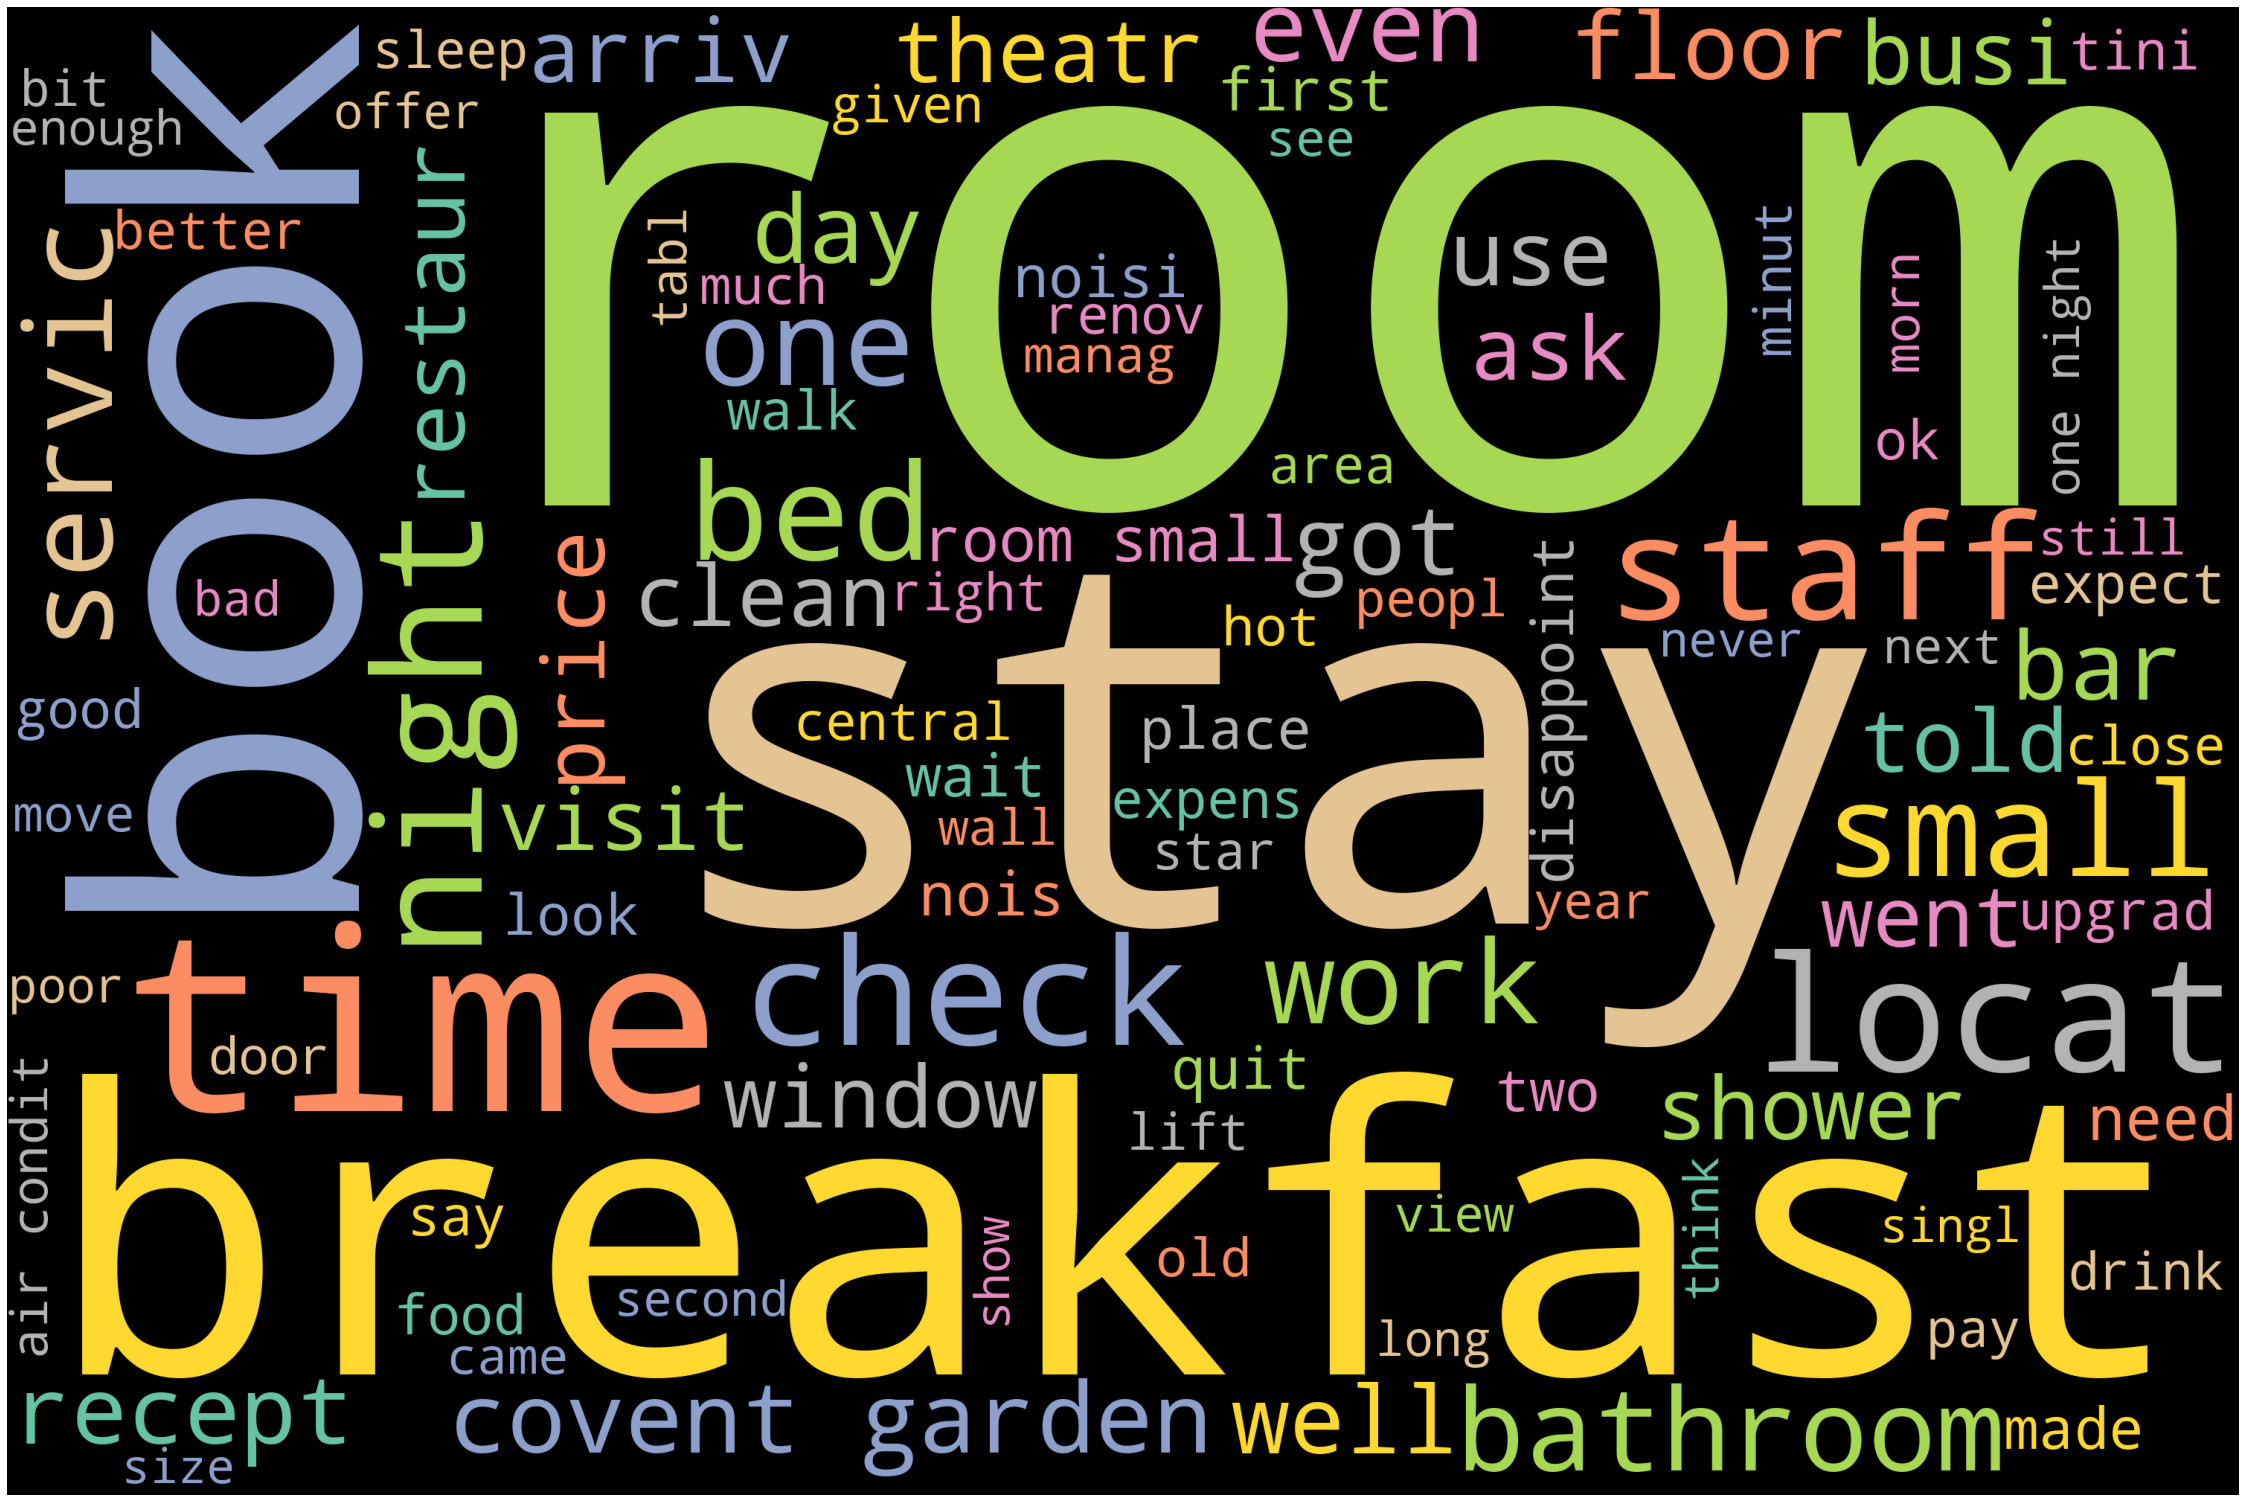

In [114]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [115]:
## Wordcloud for Negative reviews.

In [116]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [117]:
text = ' '.join(Negative_senti['cleaned_1'])

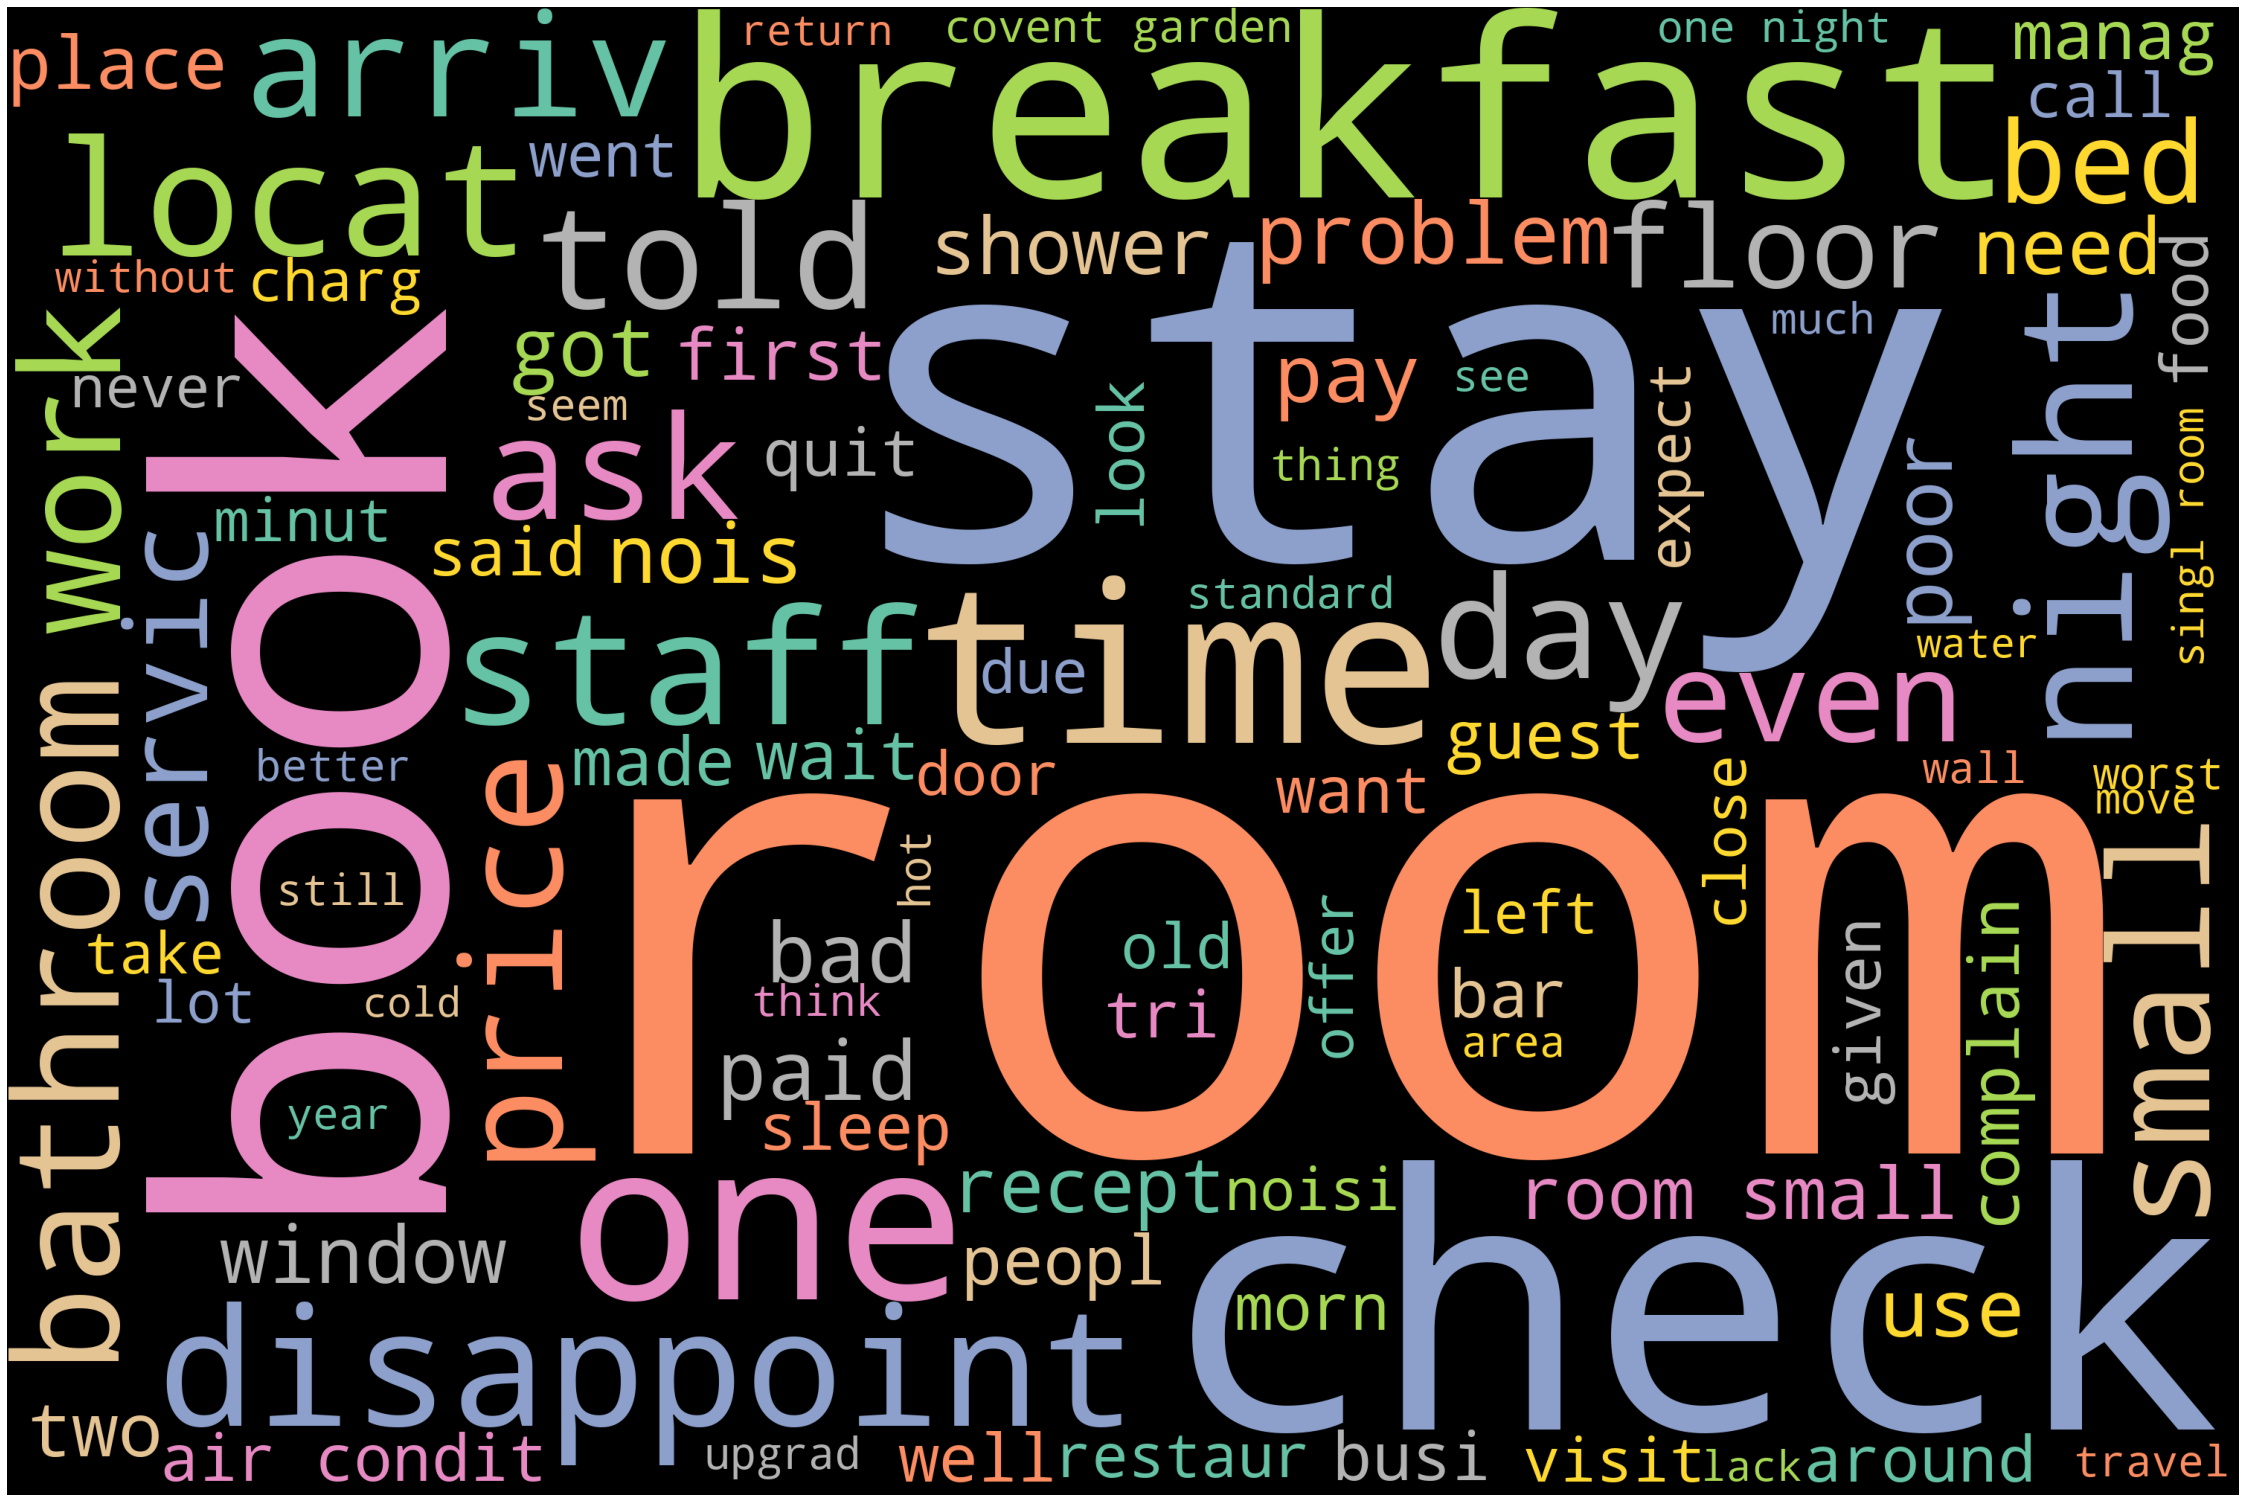

In [118]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

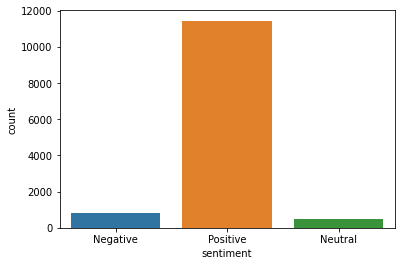

In [119]:
import seaborn as sns
sns.countplot(x='sentiment',data=hotel)
plt.show()

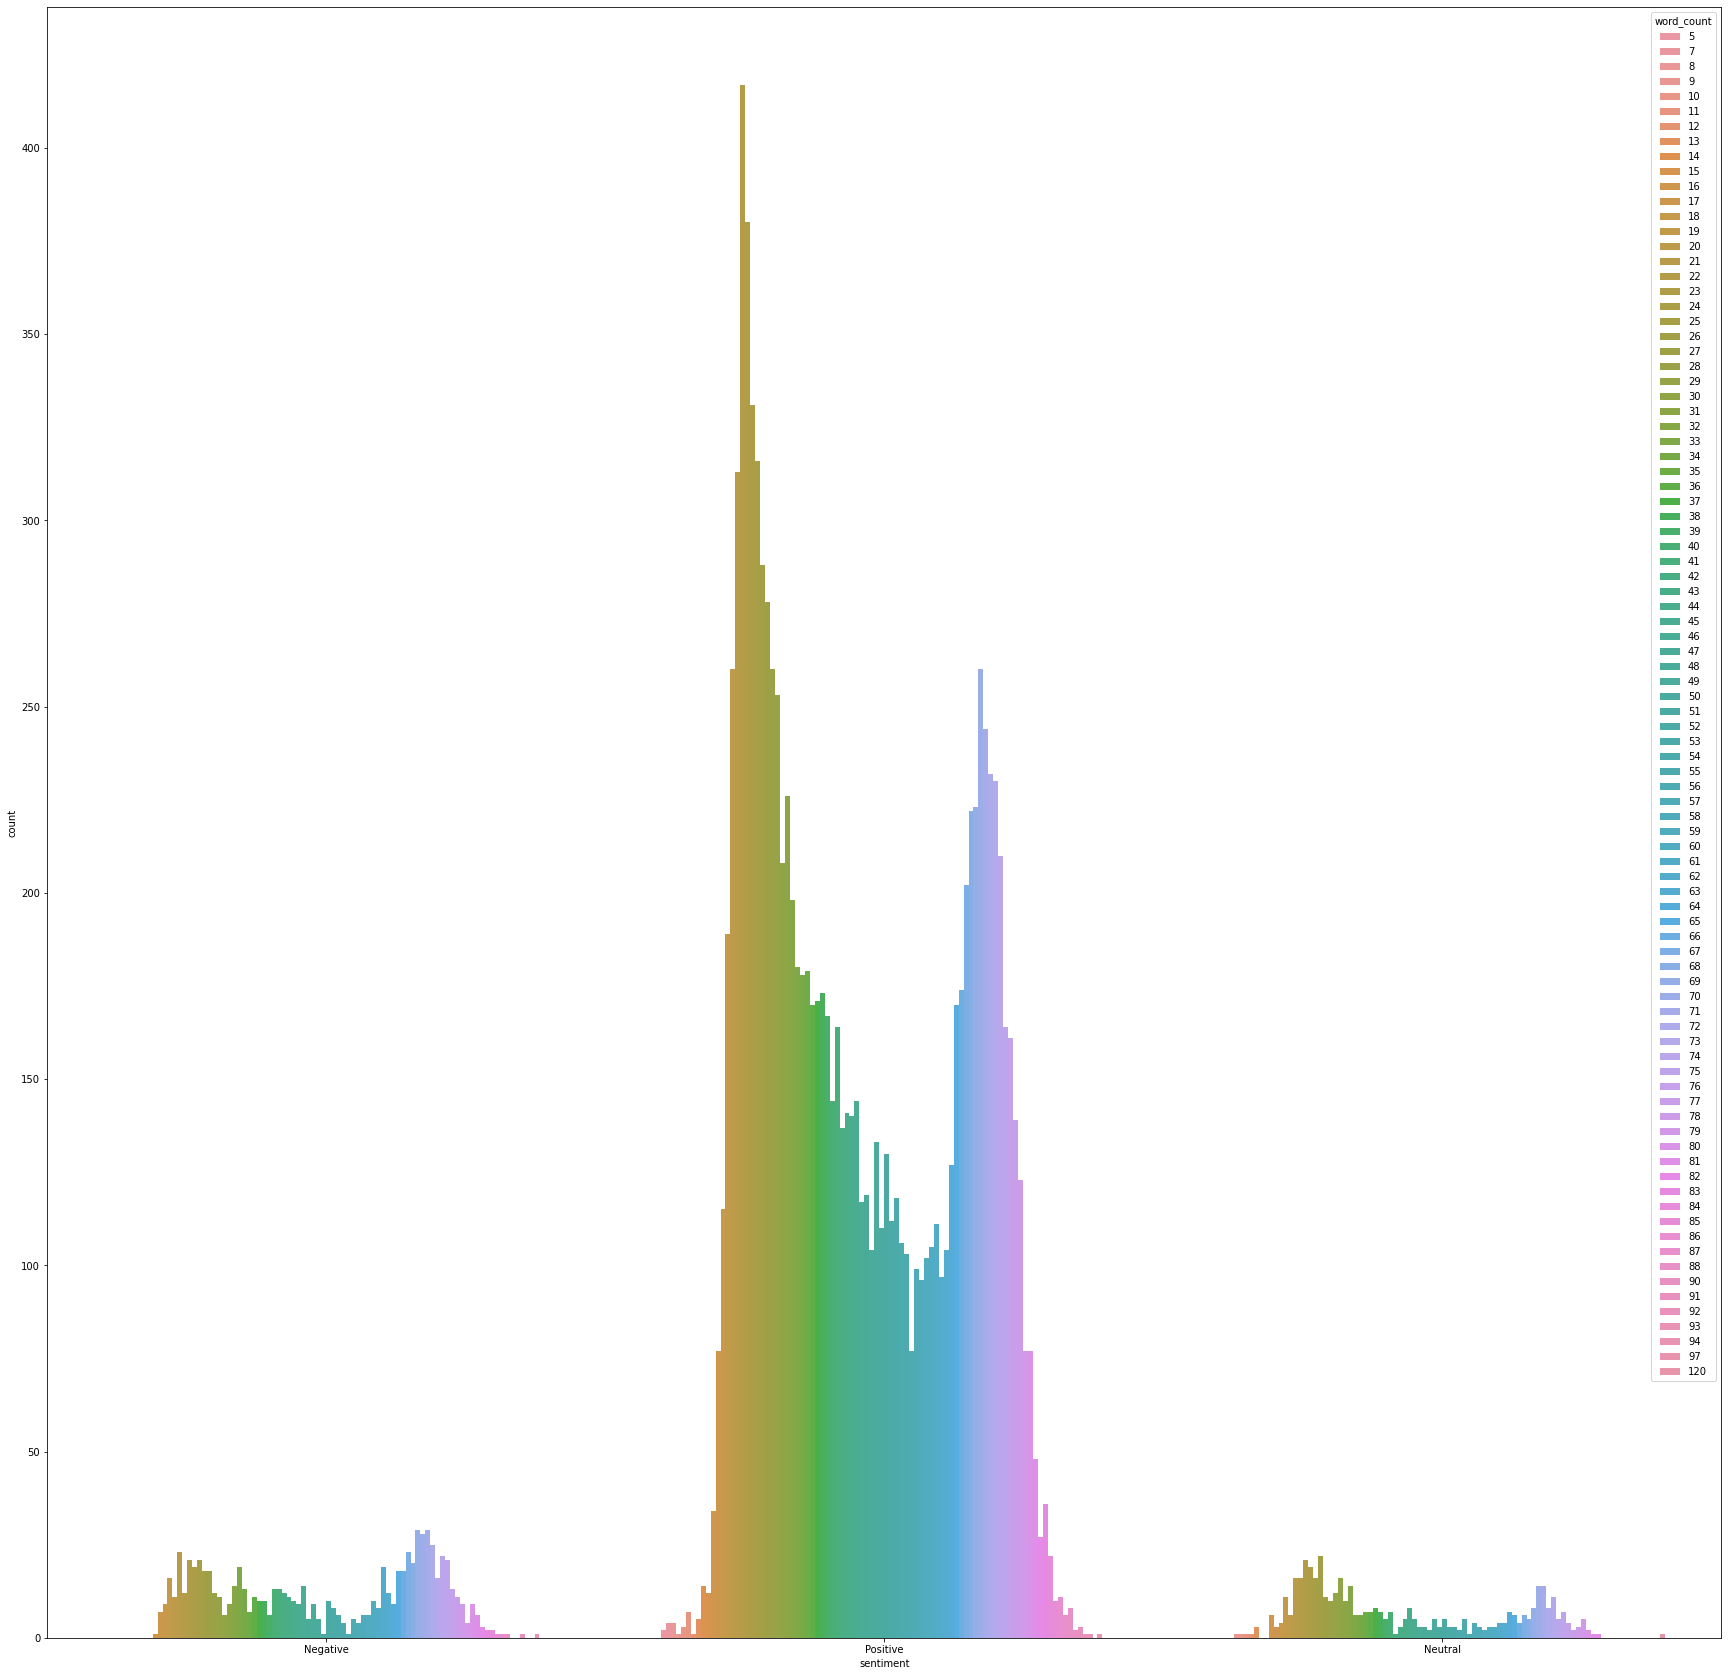

In [120]:
plt.figure(figsize=(30, 30))
sns.countplot(x='sentiment',hue='word_count',data=hotel)
plt.show()

In [121]:
##Feature Extraction

In [122]:
# for positive reviews

In [123]:
Positive_senti.head()

Reviews  ... sentiment
1  Spent a couple of nights in this hotel and it ...  ...  Positive
2  My partner and I stayed here and really couldn...  ...  Positive
3  Visited London for three days with my daughter...  ...  Positive
4  Was fantastic to be back in a hotel again and ...  ...  Positive
6  Spent a couple of nights in this hotel and it ...  ...  Positive

[5 rows x 19 columns]

In [124]:
positive_rev=Positive_senti['cleaned_1']

In [125]:
positive_rev=pd.DataFrame(data=positive_rev)

In [126]:
positive_rev

cleaned_1
1      spent coupl night fantast central staff friend...
2      partner stay fault staff friendli noth bother ...
3      visit three day daughter mid juli book late de...
4      fantast somewher central stay time ago pleasan...
6      spent coupl night fantast central staff friend...
...                                                  ...
12727  famili stay tripl night feb room clean effici ...
12728  stay christma day locat beat within walk dista...
12729  got long holiday overal stay turn fine take st...
12730  ideal locat within walk distanc squar chare cr...
12731  stay busi mani time total sever month standard...

[11438 rows x 1 columns]

### Count Vectorization on Positive reviews

In [127]:
positive_rev = [cleaned_1.strip() for cleaned_1 in positive_rev.cleaned_1] # remove both the leading and the trailing characters
positive_rev = [cleaned_1 for cleaned_1 in positive_rev if cleaned_1] # removes empty strings, because they are considered in Python as False
positive_rev[0:10] 

['spent coupl night fantast central staff friendli help clean safe comfort stay highli recommend',
 'partner stay fault staff friendli noth bother troubl aircon someon within minut fix flight night time watch luggag free charg moham friendli help locat amaz covent garden squar bottom street buckingham minut walk water eye central clean modern fresh bed comfort great view definit recommend',
 'visit three day daughter mid juli book late deal got fantast price b b delux room arriv earli room readi staff help check u keep case whilst went explor visit one hottest year air condit room bless bed comfort sofa bed room could made need room face directli shutter close practic silent disturb sleep night room decor modern clean comfort plenti space u alongsid mini bar love room shower room',
 'fantast somewher central stay time ago pleasantli surpris massiv overhaul place yet still keep sympathet price good valu',
 'spent coupl night fantast central staff friendli help clean safe comfort stay hi

In [128]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(positive_rev) 

In [129]:
print(vectorizer.vocabulary_)

{'spent': 8316, 'coupl': 2108, 'night': 5966, 'fantast': 3334, 'central': 1459, 'staff': 8403, 'friendli': 3672, 'help': 4232, 'clean': 1675, 'safe': 7624, 'comfort': 1813, 'stay': 8456, 'highli': 4272, 'recommend': 7193, 'partner': 6420, 'fault': 3357, 'noth': 6041, 'bother': 1043, 'troubl': 9285, 'aircon': 218, 'someon': 8218, 'within': 10079, 'minut': 5642, 'fix': 3467, 'flight': 3505, 'time': 9063, 'watch': 9884, 'luggag': 5301, 'free': 3642, 'charg': 1505, 'moham': 5705, 'locat': 5204, 'amaz': 329, 'covent': 2130, 'garden': 3761, 'squar': 8379, 'bottom': 1053, 'street': 8562, 'buckingham': 1194, 'walk': 9838, 'water': 9886, 'eye': 3274, 'modern': 5696, 'fresh': 3660, 'bed': 793, 'great': 3972, 'view': 9755, 'definit': 2417, 'visit': 9777, 'three': 9010, 'day': 2340, 'daughter': 2330, 'mid': 5577, 'juli': 4837, 'book': 1021, 'late': 4999, 'deal': 2352, 'got': 3919, 'price': 6860, 'delux': 2452, 'room': 7547, 'arriv': 522, 'earli': 2860, 'readi': 7131, 'check': 1529, 'keep': 4869, '

In [130]:
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})

In [131]:
word_freq_df.sort_values('occurrences',ascending=False)

term  occurrences
7547         room        19728
8456         stay         9469
5204        locat         7778
3905         good         6613
8403        staff         6242
...           ...          ...
2231      crystal            1
6228        oscul            1
2232           ct            1
6226         orto            1
10246  zyrafalgar            1

[10247 rows x 2 columns]

### Count Vectorization on Negative reviews


In [132]:
negative_rev=Negative_senti['cleaned_1']
negative_rev=pd.DataFrame(data=negative_rev)

In [133]:
negative_rev = [cleaned_1.strip() for cleaned_1 in negative_rev.cleaned_1] # remove both the leading and the trailing characters
negative_rev = [cleaned_1 for cleaned_1 in negative_rev if cleaned_1] # removes empty strings, because they are considered in Python as False
negative_rev[0:10] 

['locat bad smallest room stay small doubl bed wall comfi hair room mani bathroom floor larg towel floor stare consist long black hair bed duvet pull anoth next time poor welcom robot size busi churn guest luckili stay one night',
 'locat bad smallest room stay small doubl bed wall comfi hair room mani bathroom floor larg towel floor stare consist long black hair bed duvet pull anoth next time poor welcom robot size busi churn guest luckili stay one night',
 'terribl custom servic tri book singl room septemb last year trivago may websit crash twice gave receiv confirm e mail assum work fast forward may blue charg credit card two room never use knew total tri call brush book administr told could noth tri email manag directli complain receiv repli feel complet rip angri even tri either rebook new date offer refund taken consider amount money noth utterli appal',
 'first choic place stay day reason price room avail sometim pay bit extra everywher happen inexpens particular date thing done

In [134]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(negative_rev)

In [135]:
print(vectorizer.vocabulary_)

{'locat': 1950, 'bad': 268, 'smallest': 3085, 'room': 2855, 'stay': 3227, 'small': 3083, 'doubl': 1018, 'bed': 316, 'wall': 3754, 'comfi': 659, 'hair': 1532, 'mani': 2010, 'bathroom': 299, 'floor': 1348, 'larg': 1875, 'towel': 3514, 'stare': 3218, 'consist': 720, 'long': 1956, 'black': 361, 'duvet': 1076, 'pull': 2633, 'anoth': 149, 'next': 2227, 'time': 3461, 'poor': 2525, 'welcom': 3793, 'robot': 2849, 'size': 3054, 'busi': 473, 'churn': 598, 'guest': 1519, 'luckili': 1977, 'one': 2318, 'night': 2233, 'terribl': 3407, 'custom': 838, 'servic': 2973, 'tri': 3542, 'book': 393, 'singl': 3042, 'septemb': 2967, 'last': 1879, 'year': 3884, 'trivago': 3548, 'may': 2044, 'websit': 3784, 'crash': 800, 'twice': 3570, 'gave': 1441, 'receiv': 2707, 'confirm': 708, 'mail': 1995, 'assum': 221, 'work': 3857, 'fast': 1275, 'forward': 1379, 'blue': 376, 'charg': 558, 'credit': 806, 'card': 502, 'two': 3574, 'never': 2219, 'use': 3679, 'knew': 1850, 'total': 3507, 'call': 487, 'brush': 445, 'administr'

In [136]:
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})

In [137]:
word_freq_df.sort_values('occurrences',ascending=False)

term  occurrences
2855      room         1712
3227      stay          624
2233     night          380
393       book          342
568      check          307
...        ...          ...
1287       feb            1
1290      feed            1
1291  feedback            1
2648       que            1
3901       zoo            1

[3902 rows x 2 columns]

#### TFidf vectorizer 
Positive Reviews

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(positive_rev)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['aaron', 'abbey', 'abl', 'abl check', 'abl get', 'abl leav', 'abl open', 'abl walk', 'absolut', 'absolut love', 'absolut perfect', 'ac', 'ac room', 'accept', 'access', 'access covent', 'access covent garden', 'access room', 'access tube', 'accommod', 'accomod', 'account', 'across', 'across road', 'across road savoy', 'across savoy', 'across street', 'across street savoy', 'action', 'activ', 'actual', 'ad', 'adapt', 'add', 'addit', 'address', 'adelphi', 'adelphi theatr', 'adequ', 'adequ clean', 'adequ need', 'adequ room', 'adequ size', 'adjac', 'adjoin', 'adjust', 'admit', 'adult', 'advanc', 'advantag', 'advertis', 'advic', 'advis', 'advisor', 'affect', 'afford', 'afraid', 'afternoon', 'afternoon tea', 'age', 'agent', 'ago', 'agre', 'ahead', 'air', 'air con', 'air con room', 'air condit', 'air condit fan', 'air condit room', 'air condit unit', 'air condit window', 'air condition', 'air room', 'aircon', 'aircondit', 'airi', 'airport', 'alarm', 'albeit', 'aldwych', 'allen', 'alloc', 'all

#### TFidf vectorizer 
Negative reviews

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(negative_rev)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['abl', 'abl check', 'abl get', 'abrupt', 'absolut', 'absolut tini', 'ac', 'ac room', 'accept', 'access', 'access room', 'accommod', 'accomod', 'accor', 'accord', 'account', 'accur', 'across', 'across street', 'act', 'actual', 'actual quit', 'actual room', 'ad', 'adapt', 'add', 'addit', 'adequ', 'adjoin', 'adjoin room', 'admit', 'admittedli', 'adult', 'advanc', 'advantag', 'advertis', 'advic', 'advis', 'affect', 'afford', 'afraid', 'afternoon', 'afternoon tea', 'afternoon tea disappoint', 'age', 'agenc', 'agent', 'ago', 'agoda', 'agre', 'ahead', 'air', 'air con', 'air con room', 'air condit', 'air condit heat', 'air condit room', 'air condit unit', 'aircon', 'airflow', 'airport', 'akin', 'alarm', 'alarm went', 'albeit', 'alert', 'alloc', 'alloc room', 'allow', 'almost', 'alon', 'along', 'alreadi', 'alreadi paid', 'altern', 'although', 'although room', 'alway', 'alway book', 'alway stay', 'amaz', 'amen', 'american', 'amount', 'amount money', 'anniversari', 'annoy', 'annoy thing', 'annua

#Bi-gram for Positive reviews

In [140]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [141]:
# Top 20 Bi-gram words
from sklearn.feature_extraction.text import CountVectorizer
top2_words = get_top_n2_words(Positive_senti['cleaned_1'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(30)

Bi-gram  Freq
0    covent garden  2748
1      great locat  1304
2       room clean  1195
3       room small  1192
4   staff friendli  1082
5     walk distanc   980
6       singl room   767
7       air condit   727
8    friendli help   715
9   breakfast good   699
10       one night   681
11      staff help   661
12      minut walk   660
13   central locat   497
14   clean comfort   472
15      stay night   460
16      valu money   448
17       good valu   444
18     locat great   444
19    definit stay   417
20     execut room   417
21      good locat   407
22     within walk   401
23     bed comfort   397
24  friendli staff   391
25        stay one   387
26      doubl room   387
27       room good   382
28     chare cross   380
29    tube station   378

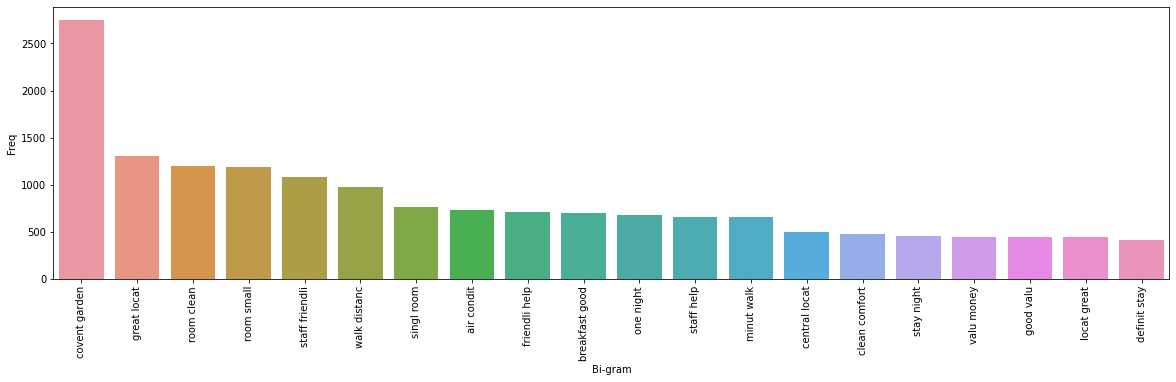

In [142]:

#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);


#Bi-gram for Negative reviews

In [143]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [144]:
# Top 20 Bi-gram words
from sklearn.feature_extraction.text import CountVectorizer
top2_words = get_top_n2_words(Negative_senti['cleaned_1'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(30)


Bi-gram  Freq
0       room small    96
1       air condit    78
2    covent garden    66
3        one night    58
4       singl room    57
5      execut room    39
6        room tini    35
7       doubl room    34
8      room servic    33
9       room readi    31
10      fire alarm    31
11      night stay    31
12        stay one    30
13      stay night    28
14   standard room    27
15     window open    27
16       two night    27
17   custom servic    26
18      small room    26
19    walk distanc    26
20     earli check    25
21      front desk    24
22       room room    23
23     even though    23
24        room air    23
25      minut walk    22
26      anoth room    22
27         air con    22
28  staff friendli    21
29      room floor    21

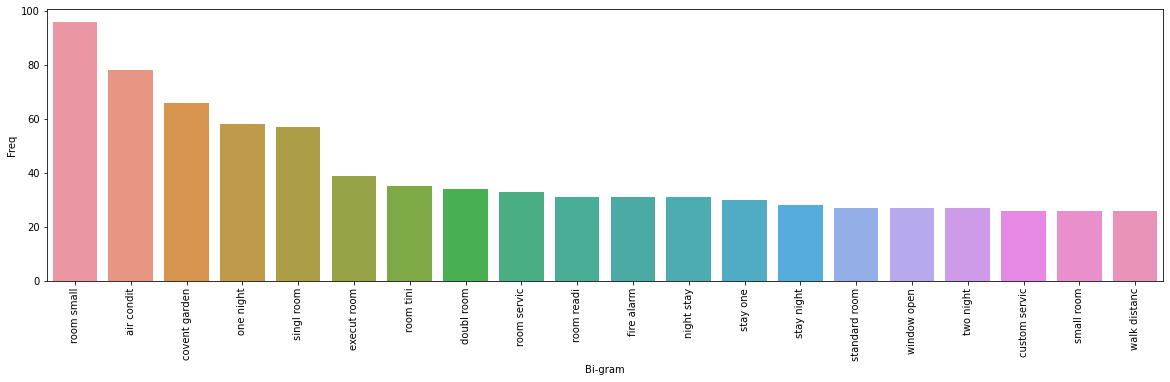

In [145]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

#Tri-gram for Positive reviews

In [146]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [147]:
top3_words = get_top_n3_words(Positive_senti['cleaned_1'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head(30)

Tri-gram  Freq
0     staff friendli help   413
1     within walk distanc   388
2          stay one night   330
3      walk covent garden   292
4     close covent garden   217
5         good valu money   187
6     locat covent garden   159
7      room clean comfort   156
8     covent garden squar   152
9       minut walk covent   136
10   theatr covent garden   134
11        room air condit   134
12         stay mani time   128
13   covent garden theatr   126
14        air condit room   125
15     near covent garden   121
16      easi walk distanc   121
17    friendli help staff   117
18    chare cross station   117
19         stay two night   114
20        tea coffe facil   114
21        room quit small   112
22    staff help friendli   111
23        stay sever time   110
24   garden leicest squar   109
25  covent garden leicest   108
26       room small clean   106
27       good night sleep   105
28         room good size   105
29    squar covent garden   105

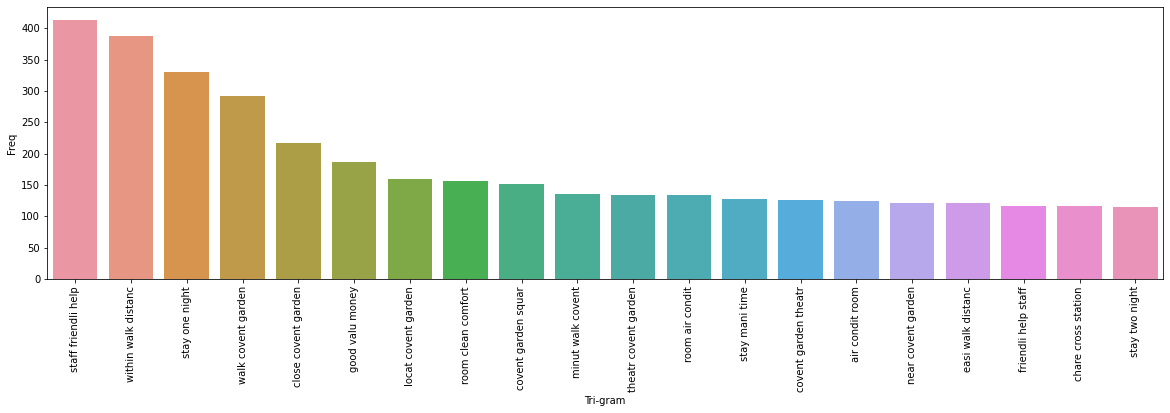

In [148]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

#Tri-gram for Negative reviews

In [149]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


In [150]:
top3_words = get_top_n3_words(Negative_senti['cleaned_1'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head(30)


Tri-gram  Freq
0          stay one night    22
1         room air condit    19
2          stay mani time    10
3     within walk distanc    10
4       room extrem small     8
5         lack air condit     8
6          room next door     7
7         air condit room     7
8         fire alarm went     6
9          room small old     6
10        paper thin wall     6
11       room first floor     6
12        stay singl room     6
13    standard doubl room     6
14        move anoth room     6
15        air condit unit     6
16        stay sever time     6
17        room small dark     6
18   theatr covent garden     6
19         two night stay     6
20      charg credit card     5
21         wait long time     5
22       singl room small     5
23        poor valu money     5
24         ask chang room     5
25    close covent garden     5
26        pay earli check     5
27    walk distanc covent     5
28  distanc covent garden     5
29        five minut walk     5

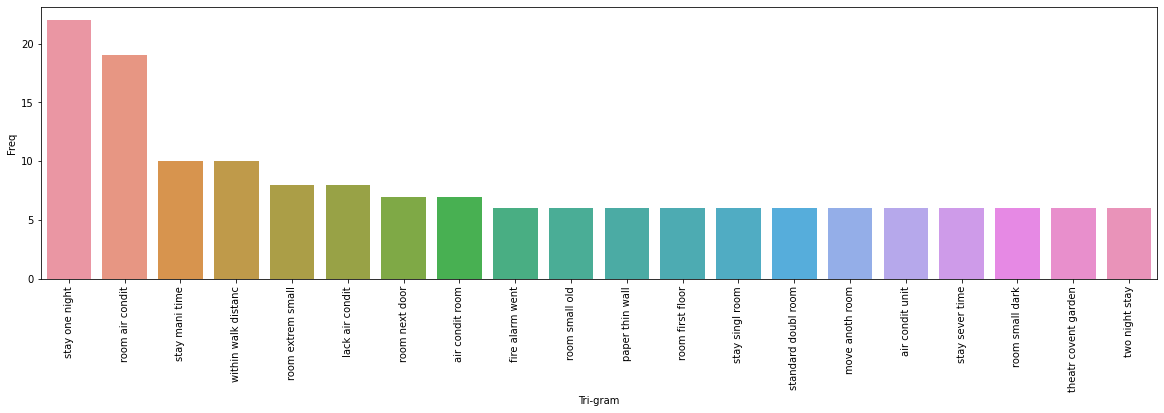

In [151]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

###From bi-gram and tri gram for positive reviews and Negative reviews it is clear that room size,air condition, staff etc are resposible for rating of the hotel.

In [152]:
hotel.head()

Reviews  ... sentiment
0  For the location this wasn t too bad  However ...  ...  Negative
1  Spent a couple of nights in this hotel and it ...  ...  Positive
2  My partner and I stayed here and really couldn...  ...  Positive
3  Visited London for three days with my daughter...  ...  Positive
4  Was fantastic to be back in a hotel again and ...  ...  Positive

[5 rows x 19 columns]

In [153]:
hotel.to_csv(r'cleaneddata.csv',index=True)

In [154]:
corpus = hotel['cleaned_1'].tolist()
corpus[:10]

['locat bad smallest room stay small doubl bed wall comfi hair room mani bathroom floor larg towel floor stare consist long black hair bed duvet pull anoth next time poor welcom robot size busi churn guest luckili stay one night',
 'spent coupl night fantast central staff friendli help clean safe comfort stay highli recommend',
 'partner stay fault staff friendli noth bother troubl aircon someon within minut fix flight night time watch luggag free charg moham friendli help locat amaz covent garden squar bottom street buckingham minut walk water eye central clean modern fresh bed comfort great view definit recommend',
 'visit three day daughter mid juli book late deal got fantast price b b delux room arriv earli room readi staff help check u keep case whilst went explor visit one hottest year air condit room bless bed comfort sofa bed room could made need room face directli shutter close practic silent disturb sleep night room decor modern clean comfort plenti space u alongsid mini bar 

In [155]:
df=hotel

In [156]:
df['sentiment'] = df['sentiment'].replace({'Negative': -1})
df['sentiment'] = df['sentiment'].replace({'Positive': 1})
df['sentiment'] = df['sentiment'].replace({'Neutral': 0})

In [157]:
y=df['sentiment']
y

0       -1
1        1
2        1
3        1
4        1
        ..
12727    1
12728    1
12729    1
12730    1
12731    1
Name: sentiment, Length: 12732, dtype: int64

# TFIDF

In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
df_tf_idf= vectorizer.fit_transform(corpus).toarray()

In [160]:
import pickle
pickle_out=open('vectorizer.pkl','wb')
pickle.dump(vectorizer,pickle_out)
pickle_out.close()

In [161]:
xtfidf = pd.DataFrame(df_tf_idf)
xtfidf

0     1     2     3         4     ...  4995  4996  4997  4998  4999
0       0.0   0.0   0.0   0.0  0.000000  ...   0.0   0.0   0.0   0.0   0.0
1       0.0   0.0   0.0   0.0  0.000000  ...   0.0   0.0   0.0   0.0   0.0
2       0.0   0.0   0.0   0.0  0.000000  ...   0.0   0.0   0.0   0.0   0.0
3       0.0   0.0   0.0   0.0  0.000000  ...   0.0   0.0   0.0   0.0   0.0
4       0.0   0.0   0.0   0.0  0.000000  ...   0.0   0.0   0.0   0.0   0.0
...     ...   ...   ...   ...       ...  ...   ...   ...   ...   ...   ...
12727   0.0   0.0   0.0   0.0  0.000000  ...   0.0   0.0   0.0   0.0   0.0
12728   0.0   0.0   0.0   0.0  0.000000  ...   0.0   0.0   0.0   0.0   0.0
12729   0.0   0.0   0.0   0.0  0.000000  ...   0.0   0.0   0.0   0.0   0.0
12730   0.0   0.0   0.0   0.0  0.147673  ...   0.0   0.0   0.0   0.0   0.0
12731   0.0   0.0   0.0   0.0  0.000000  ...   0.0   0.0   0.0   0.0   0.0

[12732 rows x 5000 columns]

In [162]:
ydf=pd.DataFrame(y)
ydf.value_counts()

sentiment
 1           11438
-1             827
 0             467
dtype: int64

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

Train-Test split 

In [164]:
x_traintfidf, x_testtfidf,y_traintfidf,y_testtfidf = train_test_split(xtfidf,ydf, test_size=0.33,random_state=0)
x_traintfidf.shape,y_traintfidf.shape, x_testtfidf.shape,y_testtfidf.shape

((8530, 5000), (8530, 1), (4202, 5000), (4202, 1))

**Balancing the splited data using SMOTE method**

In [165]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_traintfidf1, y_traintfidf1 = oversample.fit_resample(x_traintfidf, y_traintfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

In [167]:
cv = CountVectorizer(max_features=5000)
BOW = cv.fit_transform(corpus).toarray()
BOW.shape

(12732, 5000)

In [168]:
xbow=pd.DataFrame(BOW)
xbow

0     1     2     3     4     5     ...  4994  4995  4996  4997  4998  4999
0         0     0     0     0     0     0  ...     0     0     0     0     0     0
1         0     0     0     0     0     0  ...     0     0     0     0     0     0
2         0     0     0     0     0     0  ...     0     0     0     0     0     0
3         0     0     0     0     0     0  ...     0     0     0     0     0     0
4         0     0     0     0     0     0  ...     0     0     0     0     0     0
...     ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
12727     0     0     0     0     0     0  ...     0     0     0     0     0     0
12728     0     0     0     0     0     0  ...     0     0     0     0     0     0
12729     0     0     0     0     0     0  ...     0     0     0     0     0     0
12730     0     0     0     0     1     0  ...     0     0     0     0     0     0
12731     0     0     0     0     0     0  ...     0     0     0     0     0     0

[12732 rows x 5000 columns]

In [169]:
x_trainbow, x_testbow,y_trainbow,y_testbow = train_test_split(xbow,ydf, test_size=0.33,random_state=0)
x_trainbow.shape,y_trainbow.shape, x_testbow.shape,y_testbow.shape

((8530, 5000), (8530, 1), (4202, 5000), (4202, 1))

**Balancing the splited (BOW feature) data using SMOTE method**

In [170]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_trainbow1, y_trainbw1 = oversample.fit_resample(x_trainbow, y_trainbow)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [171]:
ydf=pd.DataFrame(y_trainbw1)
ydf.value_counts()

 1    7671
 0    7671
-1    7671
dtype: int64

#Evaluation Metric 
F1 score is used here as an evaluation metric. It is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is suitable for uneven class distribution problems. The important components of F1 score are:

True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.
True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.
False Positives (FP) – When actual class is no and predicted class is yes.
False Negatives (FN) – When actual class is yes but predicted class in no.
Precision = TP/TP+FP

Recall = TP/TP+FN

F1 Score = 2(Recall Precision) / (Recall + Precision)



In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC

#1) Logistic Regression It is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables. In simple words, it predicts the probability of occurrence of an event by fitting data to a logit function

### Logistic regression on BOW  features on balanced data

In [174]:
classifier = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial',random_state=40)
classifier.fit(x_trainbow1, y_trainbw1)
log_pred_test = classifier.predict(x_testbow)
log_pred_train=classifier.predict(x_trainbow1)
acc_log_train=accuracy_score(y_trainbw1,log_pred_train)*100
acc_log_test = accuracy_score(y_testbow, log_pred_test) * 100
print('Accuracy of Training data =',acc_log_train)
print("Accuracy of Test data =", acc_log_test)

Accuracy of Training data = 92.46078303567549
Accuracy of Test data = 90.57591623036649


In [175]:
print(classification_report(y_testbow, log_pred_test))

              precision    recall  f1-score   support

          -1       0.52      0.51      0.52       277
           0       0.21      0.20      0.20       158
           1       0.96      0.96      0.96      3767

    accuracy                           0.91      4202
   macro avg       0.56      0.56      0.56      4202
weighted avg       0.90      0.91      0.90      4202



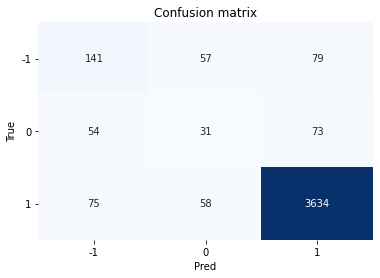

In [176]:
from sklearn import metrics
classes = np.unique(y_testbow)
cm0 = metrics.confusion_matrix(y_testbow, log_pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [177]:
### Logistic regression on TFIDF features on balanced data

In [178]:
classifier2 = LogisticRegression(solver='lbfgs', max_iter=500, multi_class='multinomial')
classifier2.fit(x_traintfidf1, y_traintfidf1)
log_pred_test = classifier2.predict(x_testtfidf)
log_pred_train=classifier2.predict(x_traintfidf1)
acc_log_train2=accuracy_score(y_traintfidf1,log_pred_train)*100
acc_log_test2 = accuracy_score(y_testtfidf, log_pred_test) * 100
print('Accuracy of Training data =',acc_log_train2)
print("Accuracy of Test data =", acc_log_test2)

Accuracy of Training data = 98.74418806761396
Accuracy of Test data = 89.8857686815802


In [179]:
print(classification_report(y_testtfidf, log_pred_test))

              precision    recall  f1-score   support

          -1       0.53      0.66      0.59       277
           0       0.23      0.32      0.27       158
           1       0.97      0.94      0.96      3767

    accuracy                           0.90      4202
   macro avg       0.58      0.64      0.60      4202
weighted avg       0.92      0.90      0.91      4202



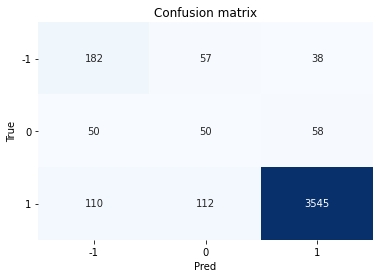

In [180]:
from sklearn import metrics
classes = np.unique(y_testtfidf)
cm0 = metrics.confusion_matrix(y_testtfidf, log_pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

#2) Random Forest
It is a supervised classification algorithm. As the name suggest, this algorithm creates the forest with a number of trees. It is a kind of ensemble learning method, where a few weak models combine to form a powerful model. In Random Forest, we grow multiple trees as opposed to a decision single tree. To classify a new object based on attributes, each tree gives a classification and we say the tree “votes” for that class. The forest chooses the classification having the most votes (over all the trees in the forest)

In [181]:
from sklearn.ensemble import RandomForestClassifier

### Random Forest classification on BOW  features on balanced data

In [182]:
classifier3 = RandomForestClassifier(n_estimators=400)
classifier3.fit(x_trainbow1, y_trainbw1)
pred_test = classifier3.predict(x_testbow)
pred_train=classifier3.predict(x_trainbow1)
acc_train3=accuracy_score(y_trainbw1,pred_train)*100
acc_test3 = accuracy_score(y_testbow, pred_test) * 100
print('Accuracy of Training data =',acc_train3)
print("Accuracy of Test data =", acc_test3)


Accuracy of Training data = 99.03098248815887
Accuracy of Test data = 90.4569252736792


In [183]:
print(classification_report(y_testbow, pred_test))

              precision    recall  f1-score   support

          -1       0.47      0.33      0.39       277
           0       0.17      0.01      0.01       158
           1       0.93      0.98      0.95      3767

    accuracy                           0.90      4202
   macro avg       0.52      0.44      0.45      4202
weighted avg       0.87      0.90      0.88      4202



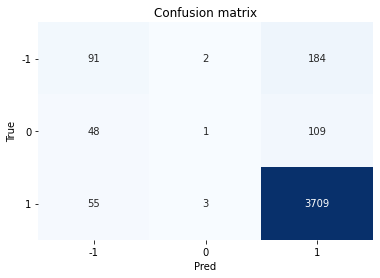

In [184]:
from sklearn import metrics
classes = np.unique(y_testbow)
cm0 = metrics.confusion_matrix(y_testbow, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

### Random Forest classification on TFIDF  features on balanced data

In [185]:
classifier4 = RandomForestClassifier(n_estimators=400)
classifier4.fit(x_traintfidf1, y_traintfidf1)
pred_test = classifier4.predict(x_testtfidf)
pred_train=classifier4.predict(x_traintfidf1)
acc_train4=accuracy_score(y_traintfidf1,pred_train)*100
acc_test4 = accuracy_score(y_testtfidf, pred_test) * 100
print('Accuracy of Training data =',acc_train4)
print("Accuracy of Test data =", acc_test4)

Accuracy of Training data = 100.0
Accuracy of Test data = 90.76630176106616


In [186]:
print(classification_report(y_testtfidf, pred_test))

              precision    recall  f1-score   support

          -1       0.71      0.25      0.36       277
           0       0.00      0.00      0.00       158
           1       0.91      0.99      0.95      3767

    accuracy                           0.91      4202
   macro avg       0.54      0.41      0.44      4202
weighted avg       0.86      0.91      0.88      4202



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


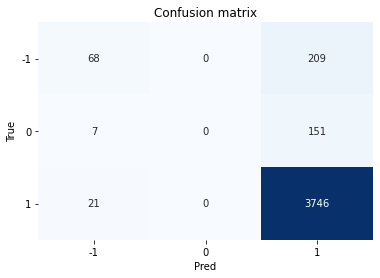

In [187]:
from sklearn import metrics
classes = np.unique(y_testtfidf)
cm0 = metrics.confusion_matrix(y_testtfidf, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

#3) Support Vector Machine (SVM)
It is a supervised machine learning algorithm which can be used for both classification or regression challenges. It is formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### SVM classification on BOW  features on balanced data

In [188]:
from sklearn.svm import LinearSVC

In [189]:
classifier5 = LinearSVC()
classifier5.fit(x_trainbow1, y_trainbw1)
pred_test = classifier5.predict(x_testbow)
pred_train=classifier5.predict(x_trainbow1)
acc_train5=accuracy_score(y_trainbw1,pred_train)*100
acc_test5 = accuracy_score(y_testbow, pred_test) * 100
print('Accuracy of Training data =',acc_train5)
print("Accuracy of Test data =", acc_test5)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy of Training data = 92.91270151653414
Accuracy of Test data = 89.6001903855307


In [190]:
print(classification_report(y_testbow, pred_test))

              precision    recall  f1-score   support

          -1       0.45      0.48      0.47       277
           0       0.23      0.19      0.21       158
           1       0.95      0.96      0.95      3767

    accuracy                           0.90      4202
   macro avg       0.55      0.54      0.54      4202
weighted avg       0.89      0.90      0.89      4202



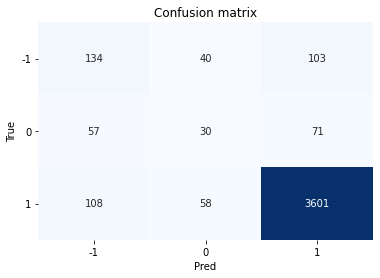

In [191]:
from sklearn import metrics
classes = np.unique(y_testbow)
cm0 = metrics.confusion_matrix(y_testbow, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

### SVM classification on TFIDF features on balanced data

In [192]:
model = LinearSVC()
model.fit(x_traintfidf1, y_traintfidf1)
pred_test = model.predict(x_testtfidf)
pred_train=model.predict(x_traintfidf1)
acc_train6=accuracy_score(y_traintfidf1,pred_train)*100
acc_test6 = accuracy_score(y_testtfidf, pred_test) * 100
print('Accuracy of Training data =',acc_train6)
print("Accuracy of Test data =", acc_test6)

Accuracy of Training data = 99.94351018989266
Accuracy of Test data = 91.40885292717753


In [193]:
print(classification_report(y_testtfidf, pred_test))

              precision    recall  f1-score   support

          -1       0.60      0.59      0.60       277
           0       0.25      0.25      0.25       158
           1       0.96      0.97      0.97      3767

    accuracy                           0.91      4202
   macro avg       0.60      0.60      0.60      4202
weighted avg       0.91      0.91      0.91      4202



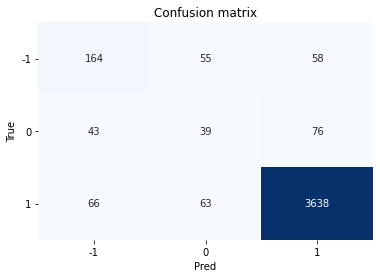

In [194]:
from sklearn import metrics
classes = np.unique(y_testtfidf)
cm0 = metrics.confusion_matrix(y_testtfidf, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

#4) Extreme Gradient Boosting (XGBoost)
Extreme Gradient Boosting (xgboost) is an advanced implementation of gradient boosting algorithm. It has both linear model solver and tree learning algorithms. Its ability to do parallel computation on a single machine makes it extremely fast. It also has additional features for doing cross validation and finding important variables. There are many parameters which need to be controlled to optimize the model.

### XGBoost on BOW  features on balanced data

In [195]:
from xgboost import XGBClassifier

In [196]:
classifier7 = XGBClassifier()
classifier7.fit(x_trainbow1, y_trainbw1)
pred_test = classifier7.predict(x_testbow.values)
pred_train=classifier7.predict(x_trainbow1)
acc_train7=accuracy_score(y_trainbw1,pred_train)*100
acc_test7 = accuracy_score(y_testbow.values, pred_test) * 100
print('Accuracy of Training data =',acc_train7)
print("Accuracy of Test data =", acc_test7)

Accuracy of Training data = 81.30621822448182
Accuracy of Test data = 88.69585911470729


In [197]:
print(classification_report(y_testbow, pred_test))

              precision    recall  f1-score   support

          -1       0.45      0.60      0.51       277
           0       0.19      0.22      0.20       158
           1       0.97      0.94      0.95      3767

    accuracy                           0.89      4202
   macro avg       0.54      0.58      0.56      4202
weighted avg       0.90      0.89      0.89      4202



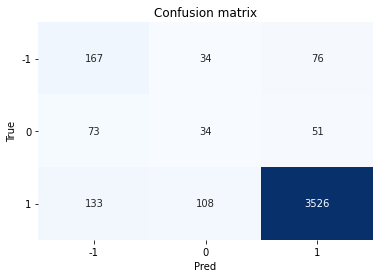

In [198]:
from sklearn import metrics
classes = np.unique(y_testbow)
cm0 = metrics.confusion_matrix(y_testbow, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

### XGBoost on TFIDF features on balanced data

In [199]:
classifier8 = XGBClassifier()
classifier8.fit(x_traintfidf1, y_traintfidf1)
pred_test = classifier8.predict(x_testtfidf.values)
pred_train=classifier8.predict(x_traintfidf1)
acc_train8=accuracy_score(y_traintfidf1,pred_train)*100
acc_test8 = accuracy_score(y_testtfidf.values, pred_test) * 100
print('Accuracy of Training data =',acc_train8)
print("Accuracy of Test data =", acc_test8)

Accuracy of Training data = 92.28262286533699
Accuracy of Test data = 87.10138029509757


In [200]:
print(classification_report(y_testtfidf.values, pred_test))

              precision    recall  f1-score   support

          -1       0.58      0.45      0.51       277
           0       0.21      0.62      0.31       158
           1       0.98      0.91      0.94      3767

    accuracy                           0.87      4202
   macro avg       0.59      0.66      0.59      4202
weighted avg       0.92      0.87      0.89      4202



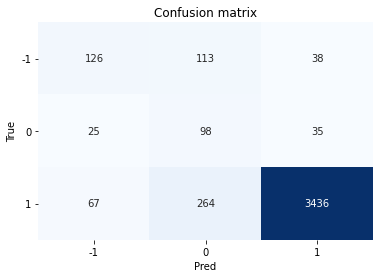

In [201]:
from sklearn import metrics
classes = np.unique(y_testtfidf)
cm0 = metrics.confusion_matrix(y_testtfidf, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

#5) Naive Bayes classifier for multinomial models
The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

### Multinomial on BOW  features on balanced data

In [202]:
from sklearn.naive_bayes import MultinomialNB

In [203]:
classifier9 = MultinomialNB()
classifier9.fit(x_trainbow1, y_trainbw1)
pred_test = classifier9.predict(x_testbow)
pred_train=classifier9.predict(x_trainbow1)
acc_train9=accuracy_score(y_trainbw1,pred_train)*100
acc_test9 = accuracy_score(y_testbow, pred_test) * 100
print('Accuracy of Training data =',acc_train9)
print("Accuracy of Test data =", acc_test9)

Accuracy of Training data = 85.16490679181332
Accuracy of Test data = 90.07615421227987


In [204]:
print(classification_report(y_testbow, pred_test))

              precision    recall  f1-score   support

          -1       0.47      0.48      0.47       277
           0       0.30      0.06      0.10       158
           1       0.94      0.97      0.95      3767

    accuracy                           0.90      4202
   macro avg       0.57      0.50      0.51      4202
weighted avg       0.88      0.90      0.89      4202



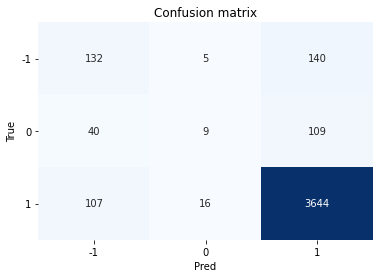

In [205]:
from sklearn import metrics
classes = np.unique(y_testbow)
cm0 = metrics.confusion_matrix(y_testbow, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

### Multinomial on TFIDF features on balanced data

In [206]:
classifier10 = MultinomialNB()
classifier10.fit(x_traintfidf1, y_traintfidf1)
pred_test = classifier10.predict(x_testtfidf)
pred_train=classifier10.predict(x_traintfidf1)
acc_train10=accuracy_score(y_traintfidf1,pred_train)*100
acc_test10 = accuracy_score(y_testtfidf, pred_test) * 100
print('Accuracy of Training data =',acc_train10)
print("Accuracy of Test data =", acc_test10)

Accuracy of Training data = 92.4390561856342
Accuracy of Test data = 82.84150404569253


In [207]:
print(classification_report(y_testtfidf, pred_test))

              precision    recall  f1-score   support

          -1       0.33      0.67      0.44       277
           0       0.15      0.23      0.18       158
           1       0.96      0.86      0.91      3767

    accuracy                           0.83      4202
   macro avg       0.48      0.59      0.51      4202
weighted avg       0.89      0.83      0.85      4202



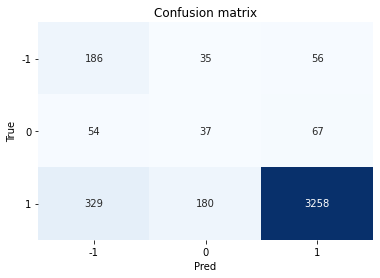

In [208]:
from sklearn import metrics
classes = np.unique(y_testtfidf)
cm0 = metrics.confusion_matrix(y_testtfidf, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

## Model's Summary

In [214]:
AS={'Models':['Logistic Regression(BOW)','Logistic Regression (TFIDF)','Random Forest(BOW)', 'Random Forest(TFIDF)', 'LinearSVC(BOW)','LinearSVC(TFIDF)','XGBoost(BOW)','XGBoost(TFIDF)','Multinomial Naive Bayes(BOW)', 'Multinomial Naive Bayes(TFIDF)'],
    'Train Accuracy':[acc_log_train,acc_log_train2,acc_train3,acc_train4,acc_train5,acc_train6,acc_train7,acc_train8,acc_train9,acc_train10]
    ,'Test Accuracy':[acc_log_test,acc_log_test2,acc_test3,acc_test4,acc_test5,acc_test6,acc_test7,acc_test8,acc_test9,acc_test10],
    'F1-score':[0.96,0.96,0.95,0.95,0.95,0.97,0.95,0.94,0.95,0.91]
    ,'precision':[0.96,0.97,0.93,0.91,0.95,0.96,0.97,0.98,0.94,0.96]}
 

In [215]:
Model_Acc=pd.DataFrame(AS, index =[1,2,3,4,5,6,7,8,9,10])

In [216]:
Model_Acc

Models  Train Accuracy  ...  F1-score  precision
1         Logistic Regression(BOW)       92.460783  ...      0.96       0.96
2      Logistic Regression (TFIDF)       98.744188  ...      0.96       0.97
3               Random Forest(BOW)       99.030982  ...      0.95       0.93
4             Random Forest(TFIDF)      100.000000  ...      0.95       0.91
5                   LinearSVC(BOW)       92.912702  ...      0.95       0.95
6                 LinearSVC(TFIDF)       99.943510  ...      0.97       0.96
7                     XGBoost(BOW)       81.306218  ...      0.95       0.97
8                   XGBoost(TFIDF)       92.282623  ...      0.94       0.98
9     Multinomial Naive Bayes(BOW)       85.164907  ...      0.95       0.94
10  Multinomial Naive Bayes(TFIDF)       92.439056  ...      0.91       0.96

[10 rows x 5 columns]

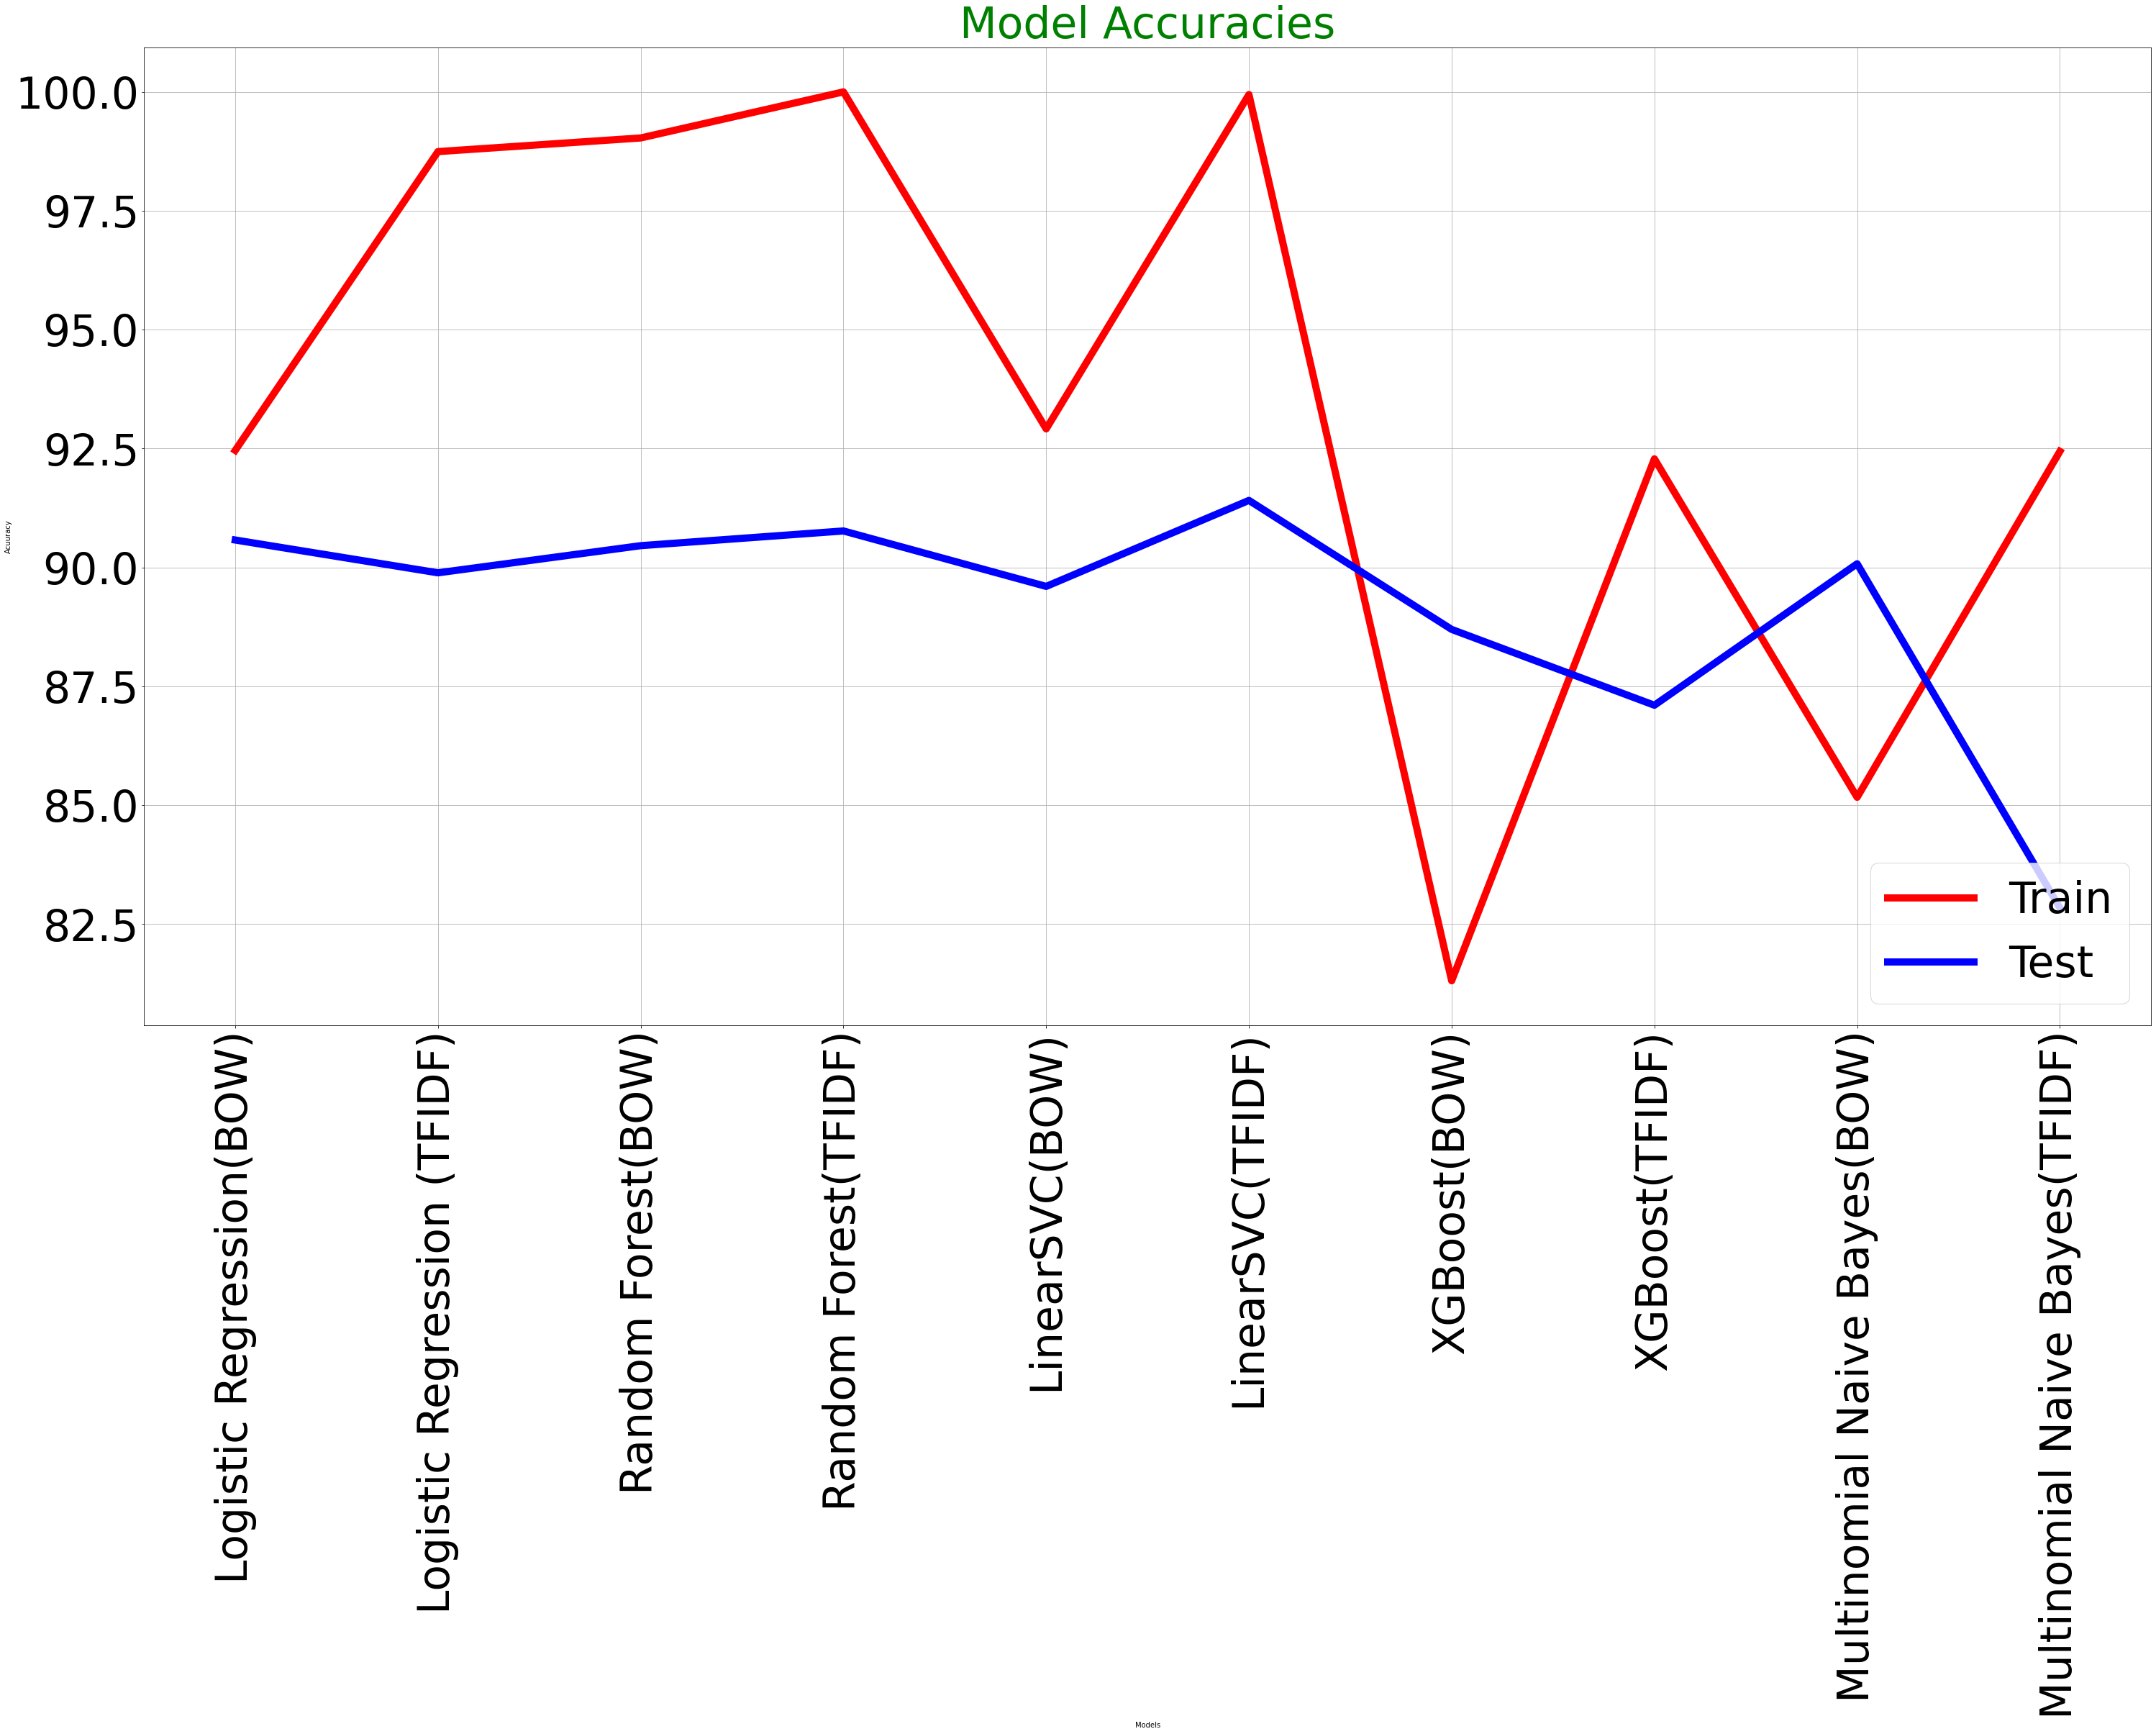

In [217]:
plt.figure(figsize =(50, 25))
plt.plot(Model_Acc['Models'],Model_Acc['Train Accuracy'],c='red', lw=10)
plt.plot(Model_Acc['Models'],Model_Acc['Test Accuracy'],c='blue', lw=10)
plt.title('Model Accuracies',fontdict={'fontsize': 60,'fontweight' : 60,'color' : 'g'})
plt.xlabel('Models')
plt.ylabel('Acuuracy')
plt.legend(['Train', 'Test'], loc='lower right',fontsize=60)
plt.yticks(fontsize=60)
plt.xticks(rotation=90, fontsize=60)
plt.grid()
plt.show();

In [218]:
# we are getting High accuracy, high F1 score and precision for the LinearSVC(TFIDF),we will use this model for prediction

In [219]:

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet=WordNetLemmatizer()
cv = CountVectorizer()

# Prediction

In [220]:
def clean_text(a):
    print("Number of words in Review:", len(a.split()))
    text=re.sub('[^A-za-z0-9]',' ',a)
    text=text.lower()
    text=text.split(' ')
    text = [wordnet.lemmatize(word) for word in text if word not in (stopwords.words('english'))]
    text = ' '.join(text)
    top2_words = get_top_n2_words([text],n=5) 
    df = pd.DataFrame(top2_words)
    df.columns=["Bi-gram", "Freq"]
    print(df)
   
    return text

In [221]:
def expression_check(prediction_input):
    if prediction_input == -1:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print(" Input statement has Neutral Sentiment.")

In [226]:
# function to take the input statement and perform the same transformations we did earlier
def sentiment_predictor(input):
    input = clean_text(input)
    transformed_input = vectorizer.transform([input])
    prediction = model.predict(transformed_input)
    expression_check(prediction)
    r = Rake(language='english', stopwords=STOPWORDS)
    r.extract_keywords_from_text(input)
    r.get_ranked_phrases()
    print(r.get_ranked_phrases())
    
    
    
    
   

In [227]:
a=('Looked a 3 night stay  breakfast was a samples  you had to wait to be called to line up  shouted at by a member of staff in the breakfast room for lining up to soon  chef putting bread in the coaster with bear hands  chef having a mask round his neck  Making one cocktail  enough for one and putting it in two glass   they went back 3 time until we got a full glass  made to feel uncomfortable an unwelcome  ')

In [228]:
sentiment_predictor(a)

Number of words in Review: 80
            Bi-gram  Freq
0      looked night     1
1        night stay     1
2    stay breakfast     1
3  breakfast sample     1
4       sample wait     1
 Input statement has Neutral Sentiment.
['looked 3 night stay breakfast sample wait called line shouted member staff breakfast room lining soon chef putting bread coaster bear hand chef mask round neck making one cocktail enough one putting two glass went back 3 time got full glass made feel uncomfortable unwelcome']


In [229]:
b=('For the location this wasn t too bad  However  was the smallest hotel room i have ever stayed in  Small double bed up against the wall which was not particularly com  Pairs all over the room including many on the bathroom floor  ended up putting a large towel down on the floor so they stopped staring at me  To make it consistent a very long black hair in the bed once the duet was pulled back  I will find another hotel next time  Poor welcome very robotic but a hotel of this size and busy will just chun guests in and out  Lucky we only stayed one night ')

In [230]:
sentiment_predictor(b)

Number of words in Review: 108
            Bi-gram  Freq
0      location bad     1
1       bad however     1
2  however smallest     1
3    smallest hotel     1
4        hotel room     1
Input statement has Negative Sentiment.
['pair room including many bathroom floor ended putting large towel floor stopped staring make consistent long black hair bed duet pulled back find another hotel next time poor welcome robotic hotel size busy chun guest lucky stayed one night', 'stayed small double bed wall particularly', 'smallest hotel room', 'location bad']


In [231]:
import pickle

In [232]:
pickle_out=open('model.pkl','wb')
pickle.dump(model,pickle_out)
pickle_out.close()